<a href="https://colab.research.google.com/github/michellssGUi/dataScience/blob/main/Deliverable_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Introdução



### 1.1 Objetivo do Projeto
Estudando os dados de venda de imóveis no Condado de King, do estado de Washington nos Estados Unidos, recomendar 5 imóveis como bons objetos de investimento imobiliário, e apontar outros 5 imóveis que não serviriam como bom investimento.




### 1.2 Descrevendo os dados:
O Dataset objeto deste jupyter notebook é referente aos dados de venda de imóveis em *King's County*, condado do estado americano de Washington, entre maio de 2014 e maio de 2015.

Segue a descrição dos dados contindos no referido dataset:

variável | Descrição
----|----
id |	Número de identificação do imóvel
date |	Data da venda
price |	Preço do imóvel na venda
bedrooms |	Número de quartos
bathrooms |	Número de banheiros
sqft_liv |	Tamanho da área habitável, em pés quadradps (square feet).
sqft_lot |	Tamanho do lote do imóvel, em pés quadradps (square feet).
floors | 	Número de andares
waterfront |	Classificação de beira-mar. ‘1’ se a propriedade é beira-mar, ‘0’ em caso negativo.
view |	Classificação de 0 a 4 do quão boa é a visão da propriedade.
condition |	Condição do imóvel, classificado de 1 a 5.
grade |	Classificação da qualidade da construção e materiais. Indicadores de 1 a 13. Mais informações no site governamental do [condado](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g).
sqft_above |	Área de construção acima do térreo.
sqft_basmt |	Área de construção abaixo do solo.
yr_built |	Ano de construção.
yr_renov |	Ano de renovação. '0' se nunca renovado.
zipcode |	Código postal americano contendo 5 dígitos.
lat |	Latitude.
long |	Longitude.
squft_liv15 |	Média de tamanho interior das 15 casas mais próximas, em pés quadrados.
squft_lot15 |	Média de tamanho dos lotes das 15 casas mais próximas, em pés quadrados.


## 2 - Os Dados

Munidos da nossa meta do projeto, devemos verificar quais dados temos disponíveis, a fim de avaliarmos se eles são relevantes pro nosso objetivo.

A fim de possibilitar a visualização e tratamento dos dados, iremos importar algumas bibliotecas python:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importadas as bibliotecas, realizamos a visualização de parte do Dataframe, a fim de verificarmos o formato e disposição dos dados:

In [ ]:
# importando dataframe com pandas, declarando a variável "df" como nosso dataframe principal do projeto.
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2.1 Entendendo e verificando nossos dados
Nos próximos linhas de código, o objetivo era avaliar nosso dataframe e verificar a confiabilidade do mesmo. 

Verificamos formato, a descrição estatística de suas variáveis, a presença de valores nulos e a de imóveis repetidos.

In [ ]:
#Verificando o formato do dataframe
print(df.shape)

(21613, 21)


In [ ]:
# Descrição estatística das colunas do dataframe.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Verificando a existência de dados nulos para amenizar sua influência nos resultados

In [ ]:
 # Checando a existência de dado nulos no DF
df.isnull().values.any() 

False

### 2.1.1 A partir do "id" (numero de identificações) realizamos uma consulta para verificar a existência de dados duplicados. Pra tal foi utilizado o atributo "duplicated" da biblioteca pandas.

In [ ]:
# Verificando a existência de imóveis com multiplas, utilizando um filtro pandas e usando como parâmetro o número de identificação do imóvel (id).

df[df.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


A cédula acima nos mostrou a ocorrência de 353 vendas. 

Os imóveis objetos dessas vendas foram vendidos mais de uma vez. Isso será interessante futuramente para a avaliação de valorização, quando pudermos comparar o preço da primeira venda com as demais.

Assim, o dataframe da cédula acima será objeto de uma análise mais minuciosa acerca da valorização dos imóveis, assim que o dataframe for devidamente formatado e tratado.

### 2.2 Tratando e Coletando Dados

Conforme breve análise acima, foi possível verificar a existência de alguns dados que não encontram-se em um formato prático para sua manipulação e estudo. 

#### 2.2.1 Tratando so dados: Data de venda


O maior ofensor de má formatação é a coluna de data (Date). Assim, faremos o tratamento da referida coluna, conforme segue:

In [ ]:
# Tratamento da coluna de data, e verificação das 5 primeiras linhas do nosso dataframe.

df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 2.2.2 Coletando dados: Preço por área e Cidade dos imóveis.

Ainda nesse etapa de trato e coleta de dados, foi possível verificar dados que seriam interessantes na avaliação dos imóveis para determinação de objetos com potencial de valorização, e que são possíveis de serem extraídos diretamente do dataframe.
Os referidos dados são:

1. Preço do imóvel por área habitável e do lote.
2. Cidade onde encontra-se o imóvel.

Dessa forma, criaremos duas novas colunas os parâmetros apontados acima: 

##### 2.2.2.1 Preço de imóvel por área:

In [ ]:
 # Coluna de preço por área, dividindo a coluna de preços pela área habitável e do lote:
df['price/sqft_living'] = df['price'] / df['sqft_living']  
df['price/sqft_lot'] = df['price'] / df['sqft_lot']  

##### 2.2.2.2 Obtendo a cidade dos imóveis:

A ideia para obter a cidade dos imóveis foi checar na internet, em algum site confiável, uma lista com os zipcodes (códigos postais) de *King's County* e utilizá-lo como base para criar uma nova coluna que irá conter o nome da cidade de cada imóvel.


In [ ]:
# df_zip_city = pd.read_html('https://www.zipdatamaps.com/king-wa-county-zipcodes')

#   A tentativa de leitura da tabela de zipcode/cidade do link acima foi infrutífera,
# uma vez que o site proíbe a extração de dados por máquinas.


#   Uma vez que o site apontado anteriormente se mostrou o mais completo e confiável
# que achamos, vamos contornar o problema de requisição da tabela utilizando a biblioteca
# requests, e iremos nos passar por um navegador comum.

# importando a biblioteca de request:

import requests

# definindo a url alvo da nossa pesquisa

url = 'https://www.zipdatamaps.com/king-wa-county-zipcodes'

#   definindo nossa Header, que servir de identificação como um navegador
# comum, e não do pandas.

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

#   Enviando o o pedido ao site, dessa vez apontando nosso Header, e nos identificando
# como navegador.

r = requests.get(url, headers=header)


df_zip_city = pd.read_html(r.text)


#  importado todos os dados da html que foram interpretados pelo pandas como df.
#Agora iremos achar tabela de nosso interesse, que está dentro da lista de
#objetos:

df_zip_city = df_zip_city[1]
df_zip_city

#   Na verdade nossa tabela está dentro de uma coluna de uma tabela maior. 
#Iremos extraí-la de lá com a seguinte linha de código:

df_zip_city = df_zip_city['List of All Zipcodes in King County, Washington']

#   Vamos aproveitar pra tirar os dados que não são úteis. Vamos dropar as colunas
# População e Zip-Type, bem como renomear as colunas úteis (Cidade e Código postal).

# Por fim, iremos transformar a coluna de zipcode em números inteiros, uma vez que
#não iremos usá-los para operações, e o float point pode ser problemático futuramente.

df_zip_city.drop(['Population', 'ZIP Type'], axis=1, inplace=True)
df_zip_city.dropna(axis=0, inplace=True)
df_zip_city['ZIP Code'] = df_zip_city['ZIP Code'].astype(int)
df_zip_city.columns = ['Zip Code', 'City']

df_zip_city.head()

,Zip Code,City
0,98001,Auburn
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


> Uma vez extraída a tabela de *zip codes* e suas respectivas cidades, vamos fazer uma verificação:

> Existe algum *zip code* no nosso dataframe que, por algum motivo, não encontra-se na lista extraída da internet?

In [ ]:
# Verificando a possibilidade levantada acima

resultado = pd.Series(df['zipcode'].unique()).isin(df_zip_city['Zip Code'])

print(resultado.value_counts())

del resultado #deletando a variável para não ocupar memória sem necessidade.

True    70
dtype: int64


> Uma vez checado acima, e com todos os resultados "True", o que aponta que os 70 zipcodes do nosso dataframe de fato encontram-se na lista extraída da internet,
podemos finalmente criar nossa coluna "City", que apontará a cidade onde cada imóvel é localizado.

In [ ]:
#Criando a coluna:

df['City'] = df['zipcode'].map(df_zip_city.set_index('Zip Code')['City'])

In [ ]:
#   Conferindo a aparência do dataframe depois do tratamento e coleta adicional 
# de dados

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot,City
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,39.274336,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,74.288870,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,18.000000,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,120.800000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,63.118812,Sammamish


# 3 - Análise Exploratória do Dataframe.

> Aqui iremos utilizar principalmente do pandas para explora e descrever nossos dados, de forma uni ou multivariada, e verificar correlações, padrões e tendências dos imóveis.


## 3.1 Análise Gráfica

> Separação e comparação do correlacionamento entre as colunas. Esse processo se faz necessário para verificas quais variáveis estão se influenciando.

In [ ]:
columns = ['price', 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 
           'grade', 'condition', 'sqft_living15']
df_correlations = df.loc[:, columns]
df_correlations = df_correlations.corr()
df_correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,condition,sqft_living15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.667434,0.036362,0.585379
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.356967,0.028472,0.391638
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.664983,-0.124982,0.568634
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.762704,-0.058753,0.756420
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.113621,-0.008958,0.144608
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.458183,-0.263768,0.279885
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,1.000000,-0.144674,0.713202
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,-0.144674,1.000000,-0.092824
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.713202,-0.092824,1.000000


> Gráfico para verificação de correlação (Seaborn)
* Neste foram utilizadas apenas as variáveis pré selecionadas.

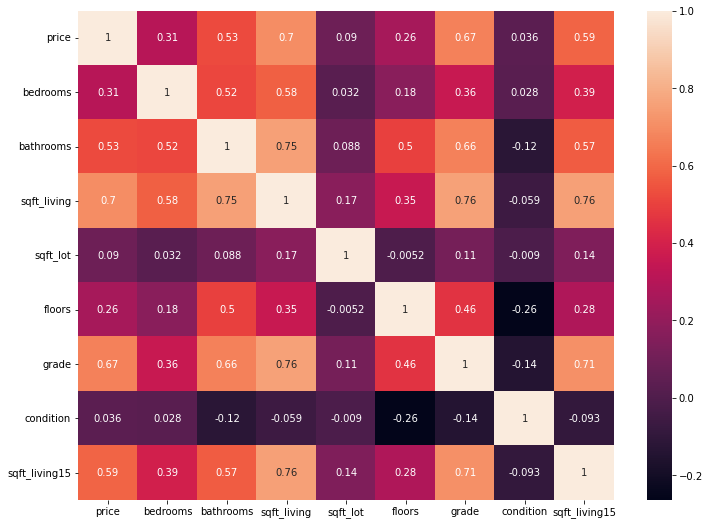

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_correlations, annot=True)
plt.show()

> Gráfico para verificação de correlação (Pandas)
* Neste foram utilizadas apenas as variáveis pré selecionadas.

In [ ]:
df_correlations.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,condition,sqft_living15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.667434,0.036362,0.585379
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.356967,0.028472,0.391638
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.664983,-0.124982,0.568634
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.762704,-0.058753,0.756420
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.113621,-0.008958,0.144608
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.458183,-0.263768,0.279885
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,1.000000,-0.144674,0.713202
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,-0.144674,1.000000,-0.092824
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.713202,-0.092824,1.000000


> Analisando os gráficos acima, chegamos as seguintes conclusões:
1. O preço tem uma correlação positiva alta com tamanho de área habitável e uma correlação positiva moderada com o número de banheiros, área construída acima do solo e média da área habitável dos 15 imóveis mais próximos.
2. O preço tem baixa correlação positiva com o número de quartos, andares, metros quadrados de porão e latitude.
3. O preço mostra relação não significativa com tamanho do terreno, ano de construção, longitude e média de área dos lotes dos 15 vizinhos mais próximos.
4. Área acima do solo, média da área habitável dos 15 imóveis mais próximos, número de banheiros e número de quartos mostram alta correlação positiva com tamanho de área habitável e podem explicar a mesma variação de preço com tamanho da área habitável.

> Gráfico de correlação completo com todas as variáveis
* Neste foram utilizadas todas as variáveis do DataFrame

In [ ]:
dfcorr = df.corr()
dfcorr.style.background_gradient(cmap='coolwarm')


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.005528,0.059807
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.554703,0.307849
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.206069,-0.062342
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.091421,0.202121
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.092314,0.022541
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.033822,-0.206367
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.003840,0.478121
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.193215,0.030605
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.220932,0.078822
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.102345,-0.085813


> Outliers foram detectados e analisados ​​usando os boxplots. 

>Dos boxplots a seguir inferimos que os dados consistem em muitos outliers para o preço da variável alvo. Entretanto os outliers para a variável preço correspondem aos outliers para número de quartos, número de banheiros e metros quadrados de área. 

>Em investigações posteriores inferimos que estes valores discrepantes correspondem a valores elevados de grau, condição e vista. Portanto, concluímos que esses outliers são legítimos e decidimos mantê-los nos dados.


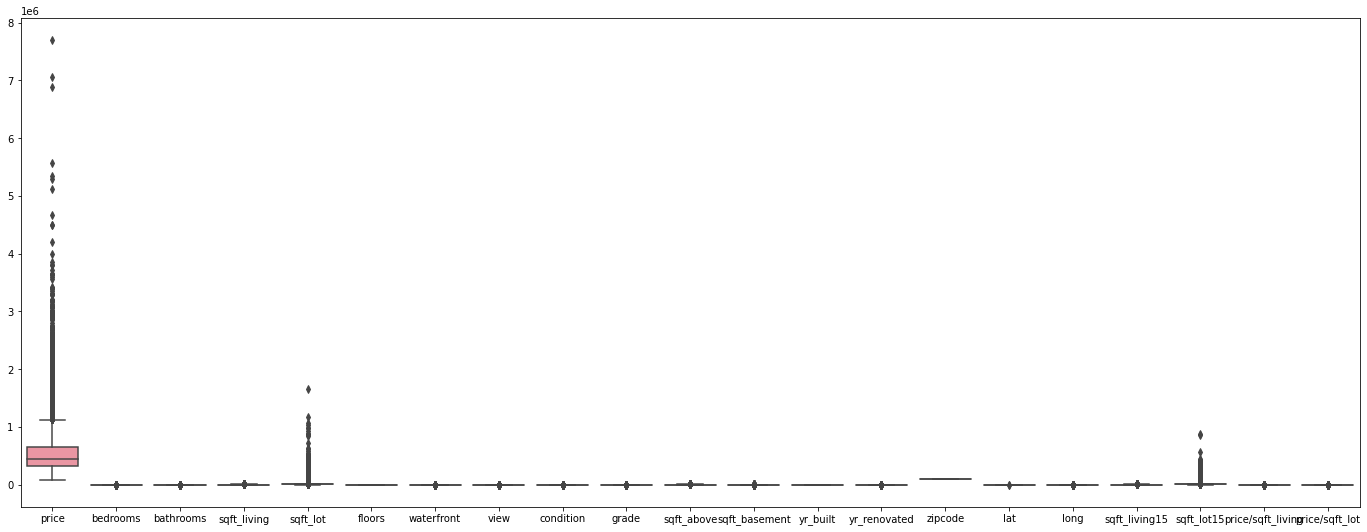

In [ ]:
plt.figure(figsize=(24, 9))
sns.boxplot(data=df.drop('id', axis=1));

> O próximo boxplot é de preço. Observando a distribuição dos outliers neste gráfico, tivemos sucesso em analisar as mesmas ocorrências na visualização de outros parâmetros, o que nos levou a decisão apontada acima, acerce de manter essas ocorrências deviantes na análise.

> É possível verificar disposição muito similar especialmente entre os gráficos de preço e área habitável (sqft_living).

> Gráfico boxplot de preço do dataframe completo.

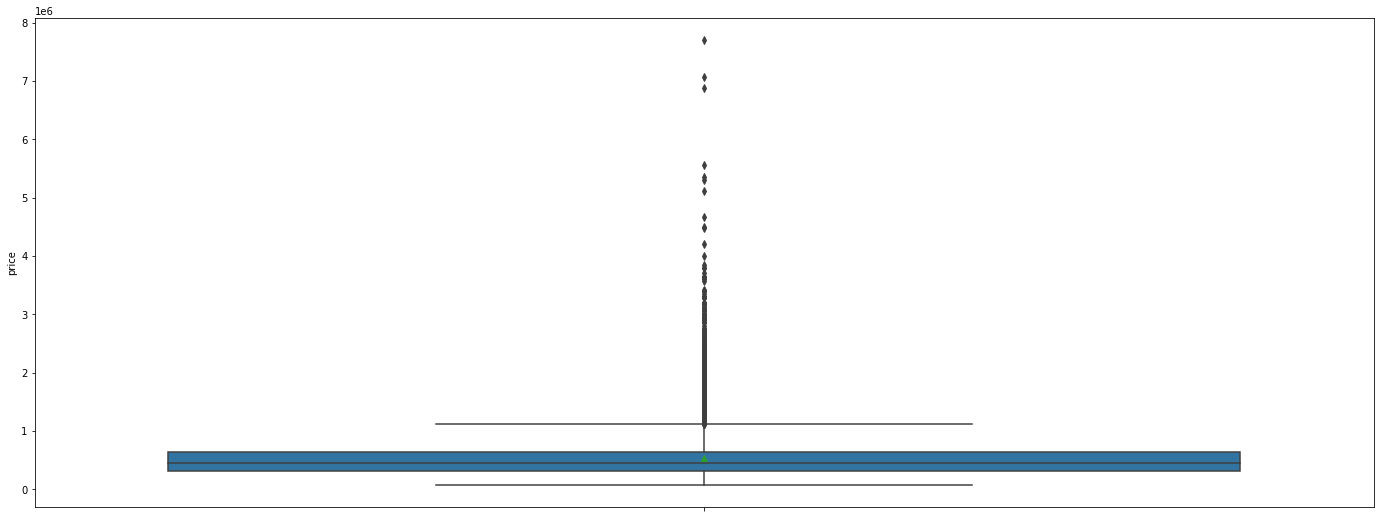

In [ ]:
plt.figure(figsize=(24, 9))
sns.boxplot(y='price',data=df, showmeans = True);

> Gráfico boxplot da quantidade de banheiros

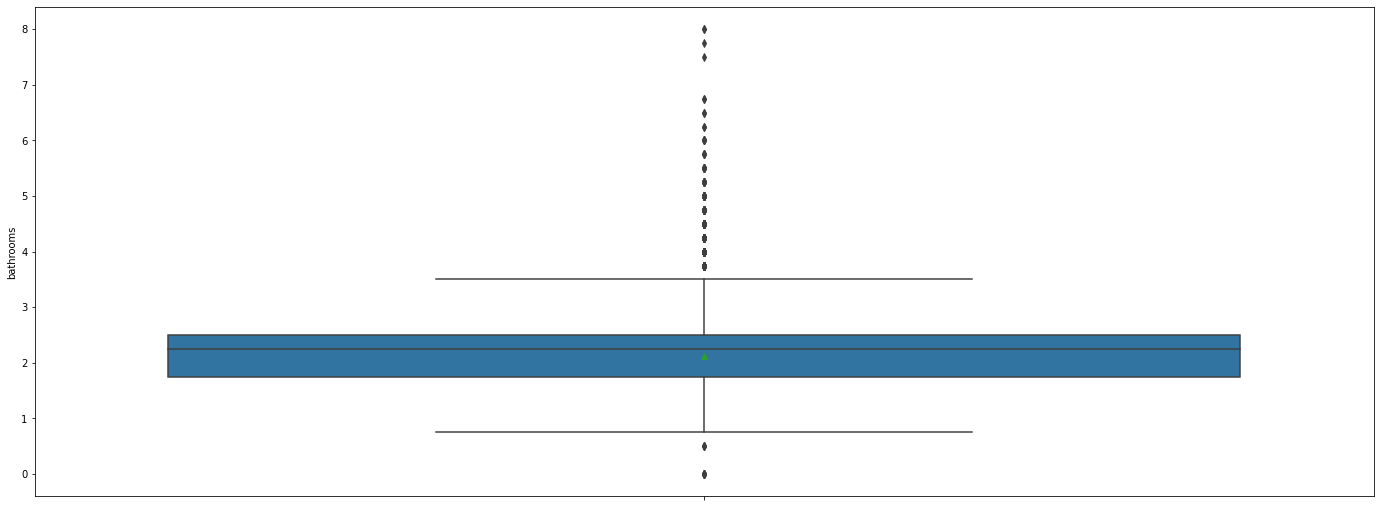

In [ ]:
plt.figure(figsize=(24, 9))
sns.boxplot(y='bathrooms',data=df, showmeans = True);

> Gráfico boxplot da quantidade de quartos.
 * Observado um outlier bem distante dos demais.

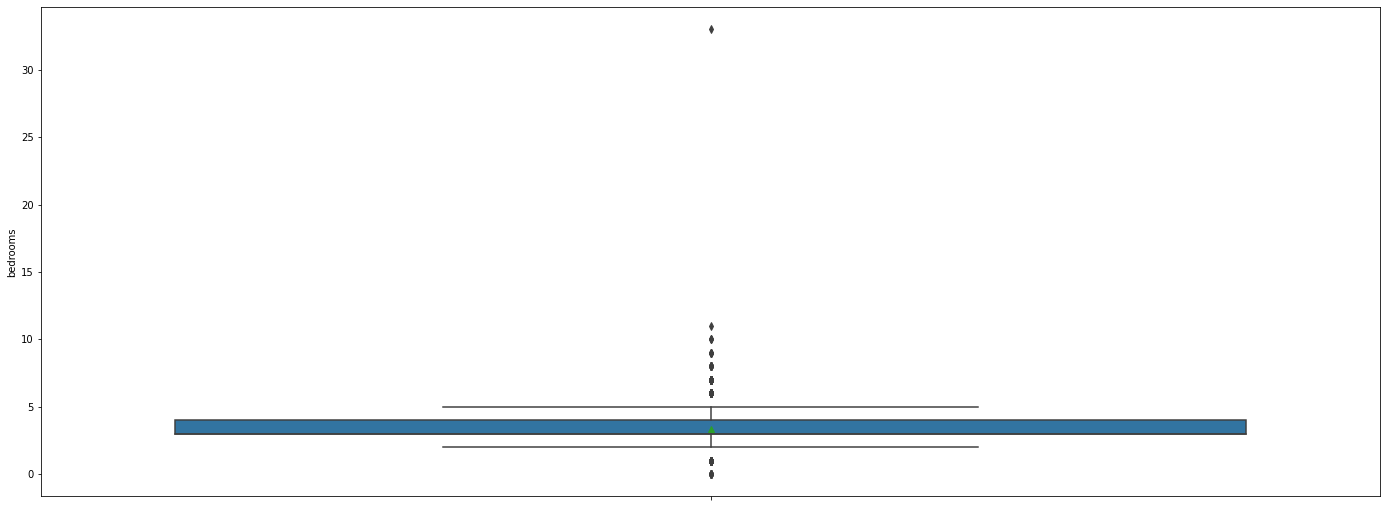

In [ ]:
plt.figure(figsize=(24, 9))
sns.boxplot(y='bedrooms', data=df, showmeans = True);

> Gráfico boxplot de área habitável. 
 * Observada a disposição de outliers superiores de forma extremamente similar ao boxplot de preço, o que justificaria a análise desses casos como legítimos (imóveis de luxo).

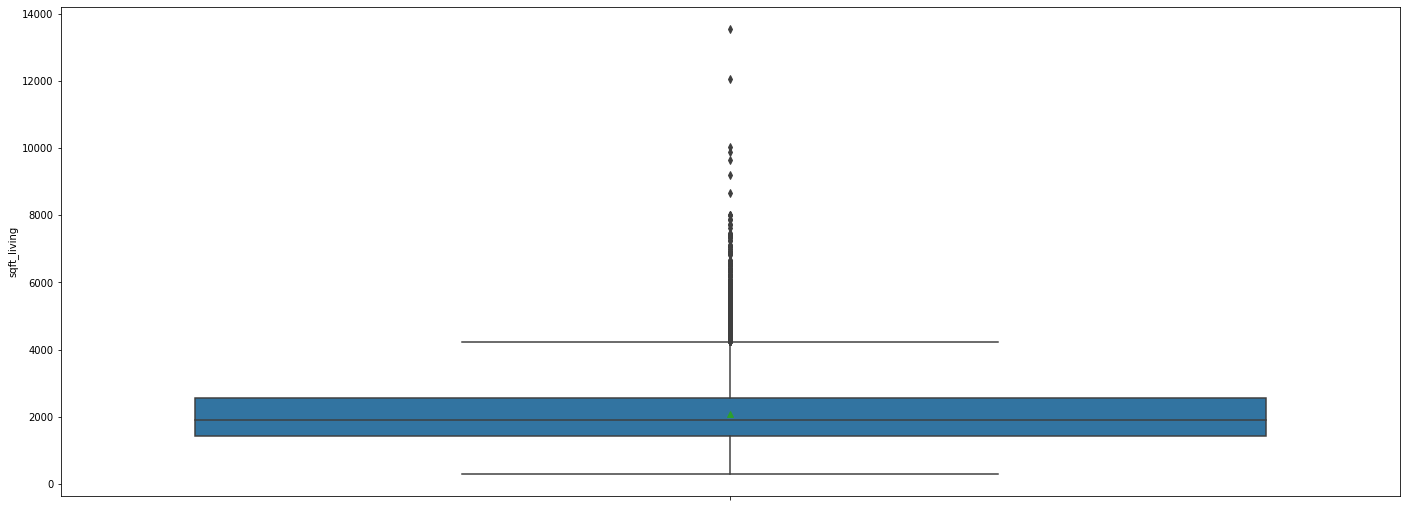

In [ ]:
plt.figure(figsize=(24, 9))
sns.boxplot(y='sqft_living',data=df, showmeans = True);

> Gráfico da coluna 'grade'
* Neste pode-se obeservar a presença de outliers que se encontram abaixo de 6  e acima de 9 onde a média é 7.

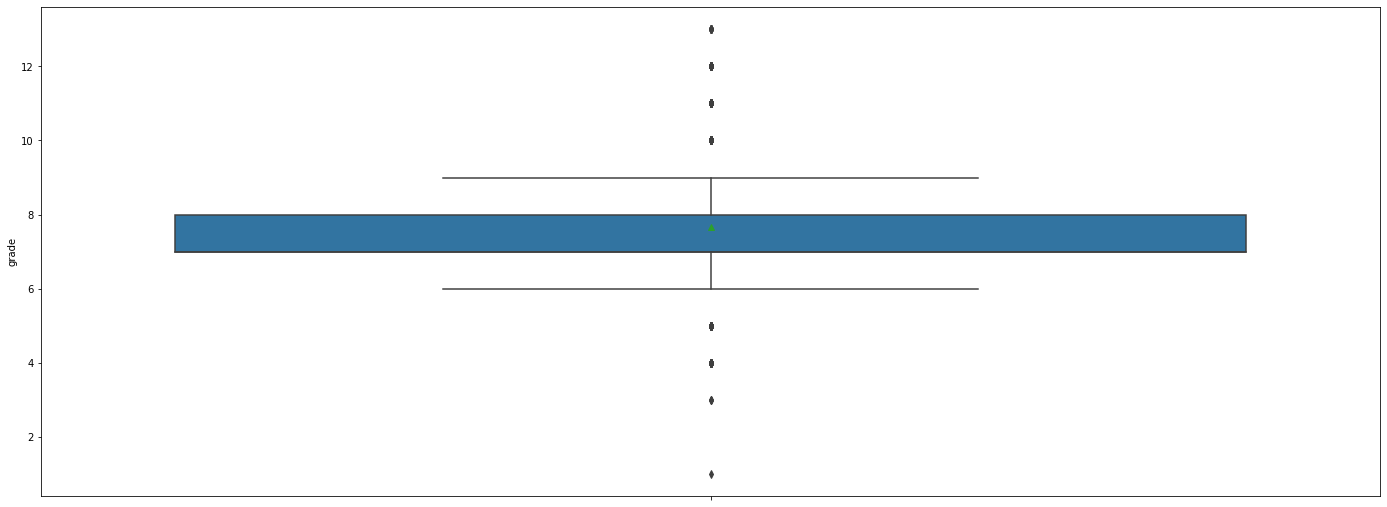

In [ ]:
plt.figure(figsize=(24, 9))
sns.boxplot(y='grade',data=df, showmeans = True);


> Gráfico do ano de construção
* Neste gráfico podemos obeservar que a média de ano é aproximadamente 1971, percebe-se que a casa mais antiga foi contruida em 1900 em contra partida a casa mais nova foi construída em 2015.

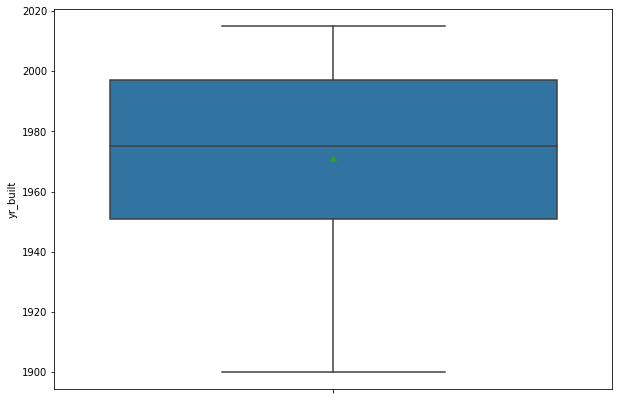

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(y='yr_built',data=df, showmeans = True);

# 4 - Analisando imóveis com vendas múltiplas

> Uma vez feita a análise dos dados, conforme passos anteriores, foi levantada a questão de como seria verificada a valorização de um imóvel, a fim de que pudessemos localizar outros bens com as mesmas características.

> Levando em consideração que o objetivo deste projeto deverá ser atingido sem a utilização de modelos de Machine Learning, a conclusão que chegamos foi que o jeito mais prático de avaliar os imóveis em relação ao seu potencial de valorização, seria analisar os imóveis que foram vendidos mais de uma vez. Assim, a valorização poderia ser observada de forma objetiva.

> Dessa análise, levando em consideração a diferença de preço entre duas alienações do mesmo imóvel, e observando o período de tempo entre ambas, seria possível inferir a valorização do bem.

> Deste modo, o objetivo desta seção do projeto é fazer a análise estatística destes imóveis com múltiplas vendas (que já sabemos que existem, graças a análise do item 2.1.1 deste notebook), e verificar se é possível traçar um perfil que temos interesse (seja de imóvel com alto ou baixo potencial de valorização).

## 4.1 Análise preliminar

> Primeiramente, vamos replicar a linha de código do item 2.1.1, uma vez que nosso dataframe já foi tratado e contém dados modificados ou refinados (data, cidade, etc.)

In [ ]:
df[df.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot,City
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,1939,0,98117,47.6870,-122.386,1570,4500,272.151899,86.000000,Seattle
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,1939,0,98117,47.6870,-122.386,1570,4500,443.037975,140.000000,Seattle
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,...,1997,0,98006,47.5503,-122.102,3860,11244,322.610723,114.351814,Bellevue
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,1997,0,98006,47.5503,-122.102,3860,11244,326.340326,115.673800,Bellevue
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,1922,1984,98146,47.4957,-122.352,1820,7460,187.096774,19.186239,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,2013,0,98045,47.4759,-121.734,2680,5992,187.313433,90.630078,North Bend
20779,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,1933,0,98133,47.7076,-122.342,1130,1598,200.000000,110.548135,Seattle
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,1933,0,98133,47.7076,-122.342,1130,1598,316.666667,175.034546,Seattle
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,2013,0,98065,47.5184,-121.886,2850,6000,213.980576,99.144333,Snoqualmie


> Da tabela acima, extraímos a informação de que houveram 353 vendas na qual o mesmo 'id' apareceu mais de uma vez. Ou seja, os imóveis objeto dessas alienações foi vendido mais de uma vez só no período abrangido pelo nosso dataframe (maio de 2014 até maio de 2015).

> Mas ainda temos que verificar a hipotese de imóveis que foram vendidos mais de duas vezes. Nossa tabela de vendas múltiplas teve um número impar de rows, o que implica em ao menos um imóvel ter sido vendido três ou mais vezes (essas vezes sendo um número ímpar).

> Dessa forma, iremos checar a quantidade de vezes que cada número identificador de imóvel, o *id*, aparece na tabela de vendas múltiplas:

In [ ]:
#contando quantas vezes os imóveis com mais de uma venda foram vendidos
#Apenas um foi vendido 3 vezes, o resto foi duas vezes.

df[df.id.duplicated(keep=False)]['id'].value_counts(sort=True)

795000620     3
6021501535    2
3935900232    2
1217000340    2
9238500040    2
             ..
2621600015    2
2206700215    2
2787460720    2
3883800011    2
7853420110    2
Name: id, Length: 176, dtype: int64

> Todos os imóveis com vendas múltiplas foram vendidos duas vezes, exceto um, que foi alienado em 3 ocasiões.

> Trata-se do Imóvel '795000620':
* Realizada a verificação dos valores deste imóvel pois sendo o que foi vendido por mais poderia-se verificar um padrão de valorização ou desvalorização deste.
* Com base nas datas das vendas e no aumento dos valores fica óbvio a valorização deste imóvel.

In [ ]:
#checando os preços desse imóvel que foi vendido 3 vezes:

df[df['id'] == 795000620]['price']

17602    115000.0
17603    124000.0
17604    157000.0
Name: price, dtype: float64

> Analisando os preços de alienação do referido imóvel, constatou-se a valorização constante do mesmo no período englobado pelos dados. 

>Além disso, é possível apontar que a valorização ocorre de uma forma semi-estável, apesar do aumento de preço mais agudo entre a segunda e terceira venda, conforme o gráfico a seguir:

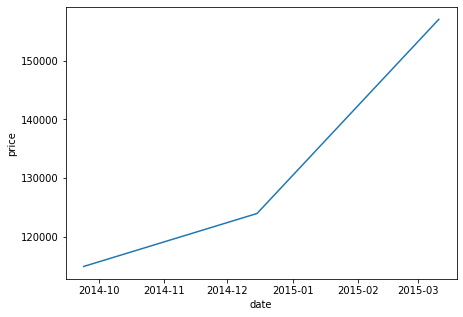

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(y='price', x='date', data=df[df['id'] == 795000620]);

## 4.2 Construção do dataframe de imóveis com multiplas vendas


> Uma vez munidos da informação que nossos imóveis com vendas múltiplas consistem, em sua maioria esmagadora, em bens que foram vendidos **duas** vezes, deu-se início a construção do novo dataframe destes imóveis.

> O imóvel vendido três vezes, por ser apenas 1 caso, e levando em consideração sua valorização quase linear entre as duas vendas, terá sua alienação intermediária ignorada neste novo dataframe, a fim de possibilitar a análise de todos os imóveis com os mesmos padrões.

> O dataframe foi criado com os seguintes passos:
1. Criado uma nova variável, df_multsells, que receberá o dataframe de vendas múltiplas como valor, com a diferença que serão mantidas apenas as primeiras aparições de cada *id*. Isso nos dará um dataframe da primeira venda de cada imóvel que foi vendido mais de uma vez.
2. Criadas mais duas variáveis, df_lastsell e df_lastsell_date, para receber respectivamente as colunas de preço e data da última venda de cada imóvel com multiplas alienações.
3. As colunas do passo 2 foram inseridas no dataframe do passo 1. Agora temos um dataframe dos imóveis com multiplas vendas, onde todos os dados são da primeira venda, porém com duas novas colunas. "last price" e "last date", respectivamente referentes ao preço e data da última alienação.
4. A fim de facilitar futuras análises, foram criadas aindas mais duas colunas com base nas informações que acabamos de obter: Uma coluna do período, em dias, entre a primeira e última venda, chamada de "date difference", e uma da diferença entre os preços de cada alienação, chamada de "price difference".
5. Ainda, no intuito de possibilitar a análise de eventual alteração de preços em relação ao preço original, foi criada uma coluna onde consta a alteração de preço entre as duas vendas em pontos percentuais em relação ao valor original.
6. Por fim, as variáveis que foram utilizadas temporariamente para criação do dataframe foram deletadas.




In [ ]:
# nosso DF, esse só com os imóveis com mais de uma venda:

df[df.duplicated(subset='id', keep=False)]

# 1. Declarando novo df com os dados da primeira venda dos dos imóveis que tem
# multiplas vendas.

df_multsells = df[df.duplicated(subset='id', keep='last')]

# 2. Obtendo os valores de data e preço dos mesmos imóveis, só que agora da última
# venda.

df_lastsell = pd.DataFrame(df[df.duplicated(subset='id', keep='first')]['price'])
df_lastsell_date = pd.DataFrame(df[df.duplicated(subset='id', keep='first')]['date'])

# 3.  Adicionando as colunas do último preço e última data no dataframe, para 
# compararmos os preços lado a lado.

df_multsells.insert(loc=2, column='last date', value=df_lastsell_date)
df_multsells.insert(loc=4, column='last price', value=df_lastsell)

# 4. Adicionando uma coluna de diferença entre os preços e datas. 
#    A diferença de data é obtida no formato timedelta65. Foi realizada a 
# conversão para números inteiros.

df_multsells.insert(loc=3, column='date difference', value= (df_multsells['last date'] - df_multsells['date']).astype('timedelta64[D]').astype(int))
df_multsells.insert(loc=6, column='price difference', value=df_multsells['last price']-df_multsells['price'])

# 5. Adicionando uma coluna do % de diferença de preços, mantendo apenas 2 casas
# decimais

df_multsells.insert(loc=7, column='price difference %', value= (df_multsells['price difference'] / df_multsells['price'] * 100).round(decimals=2))

# 6. Deletando variáveis que não serão mais usadas:

del df_lastsell
del df_lastsell_date

df_multsells.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,bedrooms,bathrooms,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot,City
93,6021501535,2014-07-25,2014-12-23,151,430000.0,700000.0,270000.0,62.79,3,1.50,...,1939,0,98117,47.6870,-122.386,1570,4500,272.151899,86.000000,Seattle
313,4139480200,2014-06-18,2014-12-09,174,1384000.0,1400000.0,16000.0,1.16,4,3.25,...,1997,0,98006,47.5503,-122.102,3860,11244,322.610723,114.351814,Bellevue
324,7520000520,2014-09-05,2015-03-11,187,232000.0,240500.0,8500.0,3.66,2,1.00,...,1922,1984,98146,47.4957,-122.352,1820,7460,187.096774,19.186239,Seattle
345,3969300030,2014-07-23,2014-12-29,159,165000.0,239900.0,74900.0,45.39,4,1.00,...,1943,0,98178,47.4897,-122.240,1020,7138,165.000000,23.128680,Seattle
371,2231500030,2014-10-01,2015-03-24,174,315000.0,530000.0,215000.0,68.25,4,2.25,...,1954,0,98133,47.7711,-122.341,1810,6929,144.495413,29.291426,Seattle


> Afim de assegurar a qualidade dos dados do novo dataframe, foram realizados dois testes:

1. A verificação de valor negativo para diferença de data entre as vendas, o que indicaria algum problema no código de seleção dos dados da primeira e segunda venda.

2. A verificação da existência de valor negativo na coluna 'price difference', o que indicaria a existência de um imóvel que teve desvalorização entre a primeira e última venda.


In [ ]:
print(f"Existe erro na coleta da selação de data: {(df_multsells['date difference'] < 0).any().any()}")
print(f"Existe desvalorização em algum imóvel: {(df_multsells['price difference'] < 0).any().any()}")

Existe erro na coleta da selação de data: False
Existe desvalorização em algum imóvel: True


> Levando em consideração que no nosso dataframe principal já possui uma coluna de preço por área, foi também adicionada a coluna de preço por área baseada no preço da última venda dos imóveis:

In [ ]:
df_multsells.insert(loc=27, column='last price/sqft_living', value= df_multsells['last price'] / df_multsells['sqft_living'])
df_multsells.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,bedrooms,bathrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,last price/sqft_living,price/sqft_lot,City
93,6021501535,2014-07-25,2014-12-23,151,430000.0,700000.0,270000.0,62.79,3,1.50,...,0,98117,47.6870,-122.386,1570,4500,272.151899,443.037975,86.000000,Seattle
313,4139480200,2014-06-18,2014-12-09,174,1384000.0,1400000.0,16000.0,1.16,4,3.25,...,0,98006,47.5503,-122.102,3860,11244,322.610723,326.340326,114.351814,Bellevue
324,7520000520,2014-09-05,2015-03-11,187,232000.0,240500.0,8500.0,3.66,2,1.00,...,1984,98146,47.4957,-122.352,1820,7460,187.096774,193.951613,19.186239,Seattle
345,3969300030,2014-07-23,2014-12-29,159,165000.0,239900.0,74900.0,45.39,4,1.00,...,0,98178,47.4897,-122.240,1020,7138,165.000000,239.900000,23.128680,Seattle
371,2231500030,2014-10-01,2015-03-24,174,315000.0,530000.0,215000.0,68.25,4,2.25,...,0,98133,47.7711,-122.341,1810,6929,144.495413,243.119266,29.291426,Seattle


> Por fim, levando em consideração que as informações de alteração de valor (preço e percentual) dos imóveis até o momento não levaram em consideração o tempo que passou entre a primeira e última alienação, foi criada uma coluna de valorização por dia, chamada de "valorization per day".
* Obs: A referida coluna pode, e inclusive terá, valores negativos. Nesse caso, são imóveis que tiveram desvalorização ao longo do período de análise entre as duas vendas.

In [ ]:
df_multsells.insert(loc=8, column='valorization per day', value= df_multsells['price difference %'] / df_multsells['date difference'])
df_multsells.sort_values(by='valorization per day', ascending=False)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,last price/sqft_living,price/sqft_lot,City
10253,2422049104,2014-09-15,2014-12-30,106,85000.0,235000.0,150000.0,176.47,1.664811,2,...,0,98032,47.3813,-122.243,1160,7680,102.409639,283.132530,9.444444,Kent
15810,7129304540,2014-12-20,2015-05-14,145,133000.0,440000.0,307000.0,230.83,1.591931,5,...,0,98118,47.5192,-122.266,1860,5980,93.006993,307.692308,23.750000,Seattle
13628,2023049218,2014-07-16,2015-03-16,243,105500.0,445000.0,339500.0,321.80,1.324280,2,...,0,98148,47.4611,-122.324,1620,8584,113.440860,478.494624,13.630491,Seattle
12377,7899800045,2014-08-28,2014-12-02,96,107000.0,232900.0,125900.0,117.66,1.225625,3,...,0,98106,47.5238,-122.356,1410,5132,117.582418,255.934066,20.898438,Seattle
8274,3883800011,2014-11-05,2015-04-08,154,82000.0,219900.0,137900.0,168.17,1.092013,3,...,0,98146,47.4987,-122.341,1140,11250,95.348837,255.697674,7.864953,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,2767603612,2014-05-12,2015-01-13,246,500000.0,489000.0,-11000.0,-2.20,-0.008943,2,...,0,98107,47.6719,-122.382,1350,1334,387.596899,379.069767,374.812594,Seattle
7845,4139420590,2014-05-20,2014-08-27,99,1212500.0,1200000.0,-12500.0,-1.03,-0.010404,4,...,0,98006,47.5521,-122.115,4060,15177,265.899123,263.157895,72.853452,Bellevue
15277,2619920170,2014-10-01,2014-12-19,79,772500.0,765000.0,-7500.0,-0.97,-0.012278,4,...,0,98033,47.6874,-122.161,3220,5083,239.164087,236.842105,180.069930,Kirkland
13298,7167000040,2014-08-13,2015-03-05,204,740000.0,700000.0,-40000.0,-5.41,-0.026520,4,...,0,98010,47.3602,-121.988,3350,183897,220.895522,208.955224,3.713871,Black Diamond


>Por fim, um gráfico de boxplot para visualizarmos os dados de valorização por dia dos imóveis com mais de uma venda.

>É possível verificar a presença de diversos outliers com altas taxas de valorização diária:

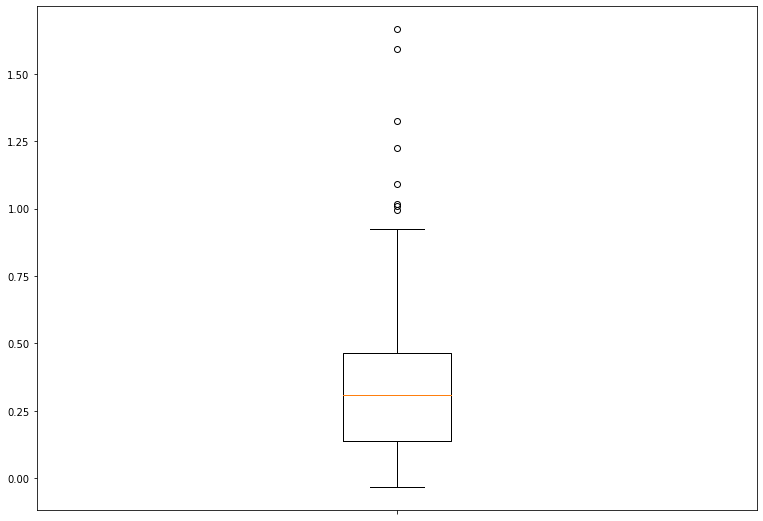

In [ ]:
data = df_multsells['valorization per day']
 
fig = plt.figure(figsize =(10, 7))
 
# Criando as instâncias do axis
ax = fig.add_axes([0, 0, 1, 1])
 
# Criando o boxplot
bp = ax.boxplot(data)

# Tirando os ticks
plt.xticks([1], [''])

 
# Imprimindo
plt.show()

> Ao final dos passos detalhados acima, chegamos a um dataframe satisfatório: com os 177 imóveis que foram vendidos mais de uma vez, cada um com o preço e data da primeira e última alienação, e com dados descrevendo o período de tempo e diferença de preço entre as duas vendas.

>Antes do próximo passo, faremos uma visualização gráfica de uma tabela de correlações desse nosso novo dataframe:


In [ ]:
df_multsells.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning:

All-NaN slice encountered



,id,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,last price/sqft_living,price/sqft_lot
id,1.000000,0.147813,0.227482,0.251772,0.068754,-0.072984,-0.049010,0.049667,0.100852,0.156099,0.002872,0.081670,nan,0.102563,0.028399,0.207467,0.135968,0.076574,0.077212,0.024373,-0.036621,0.118234,0.192467,0.151139,0.015975,0.192684,0.171690,0.174623
date difference,0.147813,1.000000,0.110014,0.154845,0.127587,0.050066,-0.336164,-0.016356,0.082290,0.048456,0.021113,0.125248,nan,0.018051,0.012385,0.057448,0.016154,0.063417,-0.014612,-0.050046,0.168414,-0.015242,-0.053237,0.069057,0.021144,0.104587,0.171368,0.178570
price,0.227482,0.110014,1.000000,0.938552,-0.177443,-0.467184,-0.470018,0.198934,0.517831,0.742958,0.331248,0.352010,nan,0.508825,0.198762,0.751014,0.677974,0.317539,0.302396,0.007505,-0.281917,0.347718,0.275204,0.764489,0.231213,0.697330,0.378187,0.520227
last price,0.251772,0.154845,0.938552,1.000000,0.173123,-0.216672,-0.275439,0.223570,0.471010,0.713573,0.287287,0.299239,nan,0.447585,0.192259,0.701762,0.611116,0.365917,0.165042,-0.016188,-0.177381,0.455346,0.165484,0.695848,0.169576,0.654120,0.529421,0.477996
price difference,0.068754,0.127587,-0.177443,0.173123,1.000000,0.715351,0.555870,0.069802,-0.134657,-0.085444,-0.126090,-0.151255,nan,-0.175756,-0.018987,-0.142111,-0.192148,0.137238,-0.392324,-0.067576,0.298703,0.306117,-0.313469,-0.197428,-0.176268,-0.124762,0.430386,-0.121576
price difference %,-0.072984,0.050066,-0.467184,-0.216672,0.715351,1.000000,0.849031,-0.102492,-0.367965,-0.371939,-0.148403,-0.265223,nan,-0.210156,-0.191324,-0.408020,-0.392313,-0.078453,-0.393194,-0.103022,0.288043,-0.118396,-0.345034,-0.383415,-0.163207,-0.410377,0.181196,-0.356691
valorization per day,-0.049010,-0.336164,-0.470018,-0.275439,0.555870,0.849031,1.000000,-0.083629,-0.334966,-0.363472,-0.139645,-0.264251,nan,-0.192928,-0.129477,-0.388902,-0.349892,-0.127633,-0.286877,-0.105795,0.147314,-0.123390,-0.239904,-0.389069,-0.150770,-0.435880,0.041982,-0.386355
bedrooms,0.049667,-0.016356,0.198934,0.223570,0.069802,-0.102492,-0.083629,1.000000,0.425254,0.496873,0.023820,0.187933,nan,0.068826,0.073334,0.200416,0.389412,0.309761,0.187685,0.069885,-0.042682,0.130771,0.074612,0.203640,0.047288,-0.146951,-0.265967,0.043564
bathrooms,0.100852,0.082290,0.517831,0.471010,-0.134657,-0.367965,-0.334966,0.425254,1.000000,0.753901,0.188682,0.520160,nan,0.300863,0.127418,0.628667,0.694213,0.312700,0.549837,-0.061871,-0.262246,0.135163,0.320219,0.570883,0.170496,0.087921,-0.181284,0.393988
sqft_living,0.156099,0.048456,0.742958,0.713573,-0.085444,-0.371939,-0.363472,0.496873,0.753901,1.000000,0.379698,0.399338,nan,0.395385,0.162598,0.775820,0.834756,0.545761,0.437173,0.057535,-0.262657,0.231447,0.345198,0.757611,0.286081,0.137753,-0.143247,0.270043


> Verificando a tabela acima, em especial com as duas colunas mais interessantes, valorização e valorização diária, percebemos que não existe um coeficiente expressivo de correlação com outras características como número de banheiros, área construída, número de quartos, etc.

>Isso se deve pelo fato de o tamanho do imóvel, quantidade de cômodos, e qualidade de construção influenciar muito o preço do bem, mas não influenciar tanto na alteração deste valor com o tempo (valorização ou desvalorização).

>Dessa forma, tendo em mente a ausência dessas correlações, torna-se complicada o objetivo de estrapolar os dados que temos em mãos para estimar o potencial de valorização dos bens sem duas vendas.

>Considerando a referida ausência de correçalações , passamos aos próximos passos do projeto, onde iremos traçar um perfil dos imóveis que mais tiveram alteração de valor (tanto positiva quanto negativamente), a fim de definir quais imóveis serão ou não um bom objeto de investimento.

# 5 - Imóveis com a valorização mais promissora

> Nesta seção do projeto, iremos tentar identificar os imóveis com maior potencial de valorização, mediante dois principais passos:

1. Analise dos imóveis com múltiplas vendas com mais valorização e definição de um perfil.

2. Aplicação de filtros dos parâmetros do perfil apontado acima, a fim de localizar imóveis com as mesmas características, e com tendência de valorização.

## 5.1 Análise exploratória dos imóveis com alta valorização


>A primeira coisa que precisamos fazer para definir um perfil de imóvel com potencial para investimento, é separar os imóveis que tem a característica almejada, no caso a **valorização**.

>Dessa forma, faremos com a ajuda da biblioteca pandas uma descrição estatística dos dados de valorização por dia dos imóveis com mais de uma venda:

In [ ]:
df_multsells['valorization per day'].describe()

count    177.000000
mean       0.346593
std        0.298905
min       -0.033305
25%        0.138000
50%        0.309419
75%        0.462949
max        1.664811
Name: valorization per day, dtype: float64

> Agora faremos a organização por ordem decrescente de valorização diária o dataset de imóveis com múltiplas vendas, a fim de verificar as maiores (topo da tabela abaixo) e menores (últimos 5 itens da tabela abaixo) valorizações.

In [ ]:
df_multsells.sort_values(by='valorization per day', axis=0, ascending=False)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,last price/sqft_living,price/sqft_lot,City
10253,2422049104,2014-09-15,2014-12-30,106,85000.0,235000.0,150000.0,176.47,1.664811,2,...,0,98032,47.3813,-122.243,1160,7680,102.409639,283.132530,9.444444,Kent
15810,7129304540,2014-12-20,2015-05-14,145,133000.0,440000.0,307000.0,230.83,1.591931,5,...,0,98118,47.5192,-122.266,1860,5980,93.006993,307.692308,23.750000,Seattle
13628,2023049218,2014-07-16,2015-03-16,243,105500.0,445000.0,339500.0,321.80,1.324280,2,...,0,98148,47.4611,-122.324,1620,8584,113.440860,478.494624,13.630491,Seattle
12377,7899800045,2014-08-28,2014-12-02,96,107000.0,232900.0,125900.0,117.66,1.225625,3,...,0,98106,47.5238,-122.356,1410,5132,117.582418,255.934066,20.898438,Seattle
8274,3883800011,2014-11-05,2015-04-08,154,82000.0,219900.0,137900.0,168.17,1.092013,3,...,0,98146,47.4987,-122.341,1140,11250,95.348837,255.697674,7.864953,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,2767603612,2014-05-12,2015-01-13,246,500000.0,489000.0,-11000.0,-2.20,-0.008943,2,...,0,98107,47.6719,-122.382,1350,1334,387.596899,379.069767,374.812594,Seattle
7845,4139420590,2014-05-20,2014-08-27,99,1212500.0,1200000.0,-12500.0,-1.03,-0.010404,4,...,0,98006,47.5521,-122.115,4060,15177,265.899123,263.157895,72.853452,Bellevue
15277,2619920170,2014-10-01,2014-12-19,79,772500.0,765000.0,-7500.0,-0.97,-0.012278,4,...,0,98033,47.6874,-122.161,3220,5083,239.164087,236.842105,180.069930,Kirkland
13298,7167000040,2014-08-13,2015-03-05,204,740000.0,700000.0,-40000.0,-5.41,-0.026520,4,...,0,98010,47.3602,-121.988,3350,183897,220.895522,208.955224,3.713871,Black Diamond


> Pela análise estatística, podemos perceber que do nosso grupo de imóveis analisados o terceiro quartil tem o valor de 0.462949.

> Isso quer dizer os 25% que mais valorizaram dos imóveis da nossa amostra, valorizaram 0.462949% ao dia OU MAIS.

> Assim, iremos traçar nosso perfil de imóvel com potencial de valorização baseado nas caraterísticas desse grupo de bens.

> Para isso, iremos criar um novo dataframe para analisarmos de forma mais minuciosa os bens que mais vem se valorizando no ano observado:


In [ ]:
df_valorizados = df_multsells.loc[df_multsells['valorization per day'] > 0.46]
df_valorizados.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,last price/sqft_living,price/sqft_lot,City
1864,2143700830,2014-10-06,2015-03-12,157,207000.0,370000.0,163000.0,78.74,0.501529,4,...,0,98055,47.4787,-122.230,1340,12300,98.571429,176.190476,10.518293,Renton
2493,9407110710,2014-11-07,2015-02-26,111,195000.0,322000.0,127000.0,65.13,0.586757,3,...,0,98045,47.4476,-121.771,1500,10125,129.139073,213.245033,23.214286,North Bend
2502,1781500435,2014-08-20,2015-02-25,189,260000.0,575000.0,315000.0,121.15,0.641005,3,...,0,98126,47.5256,-122.380,1580,6207,164.556962,363.924051,35.403050,Seattle
3756,1254200015,2014-12-16,2015-04-08,113,405000.0,625000.0,220000.0,54.32,0.480708,3,...,0,98117,47.6810,-122.388,1790,5355,179.203540,276.548673,73.636364,Seattle
3785,723049156,2014-05-23,2014-11-12,173,149000.0,284700.0,135700.0,91.07,0.526416,3,...,0,98146,47.4899,-122.337,1500,7980,87.647059,167.470588,17.235396,Seattle


> O dataframe acima contém apenas os imóveis com o terceiro quartil de valorização (os 25% mais valorizados).

>Agora, com esse dataframe em mãos, podemos analisar a presença de alguma correlação maior entre os parâmetros nesse grupo seleto de imóveis:

In [ ]:
df_valorizados.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning:

All-NaN slice encountered



,id,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,last price/sqft_living,price/sqft_lot
id,1.000000,-0.256592,0.154671,0.153675,0.122936,-0.071539,0.195002,0.026898,-0.011616,0.038117,-0.060039,-0.157406,nan,0.008173,-0.039837,0.187245,-0.075297,0.179784,0.319082,nan,-0.180547,0.074244,0.491403,0.157658,0.026004,0.164188,0.090964,0.157297
date difference,-0.256592,1.000000,-0.085993,0.235503,0.464462,0.557618,-0.252594,-0.200619,-0.230080,-0.215170,-0.128376,-0.037749,nan,-0.144206,-0.267922,-0.156286,-0.181653,-0.095775,-0.372809,nan,0.348087,0.013169,-0.392964,-0.116266,-0.085404,0.187595,0.498127,0.107216
price,0.154671,-0.085993,1.000000,0.876257,0.600090,-0.309333,-0.322494,0.310119,0.505428,0.652917,-0.109824,0.356295,nan,0.076657,0.089254,0.631146,0.409315,0.505586,0.056171,nan,0.031096,0.765719,0.120077,0.524576,-0.123631,0.595290,0.316977,0.799989
last price,0.153675,0.235503,0.876257,1.000000,0.911275,0.139911,-0.089733,0.209247,0.347045,0.471435,-0.262059,0.278916,nan,-0.022329,-0.105502,0.459251,0.297994,0.361345,-0.164772,nan,0.196077,0.763382,-0.072889,0.438391,-0.306362,0.668772,0.634247,0.829197
price difference,0.122936,0.464462,0.600090,0.911275,1.000000,0.496639,0.126643,0.082344,0.144193,0.224652,-0.341199,0.158543,nan,-0.102582,-0.251428,0.223029,0.144901,0.167798,-0.321553,nan,0.298942,0.612923,-0.223628,0.279477,-0.402949,0.601510,0.782049,0.692897
price difference %,-0.071539,0.557618,-0.309333,0.139911,0.496639,1.000000,0.609948,-0.190430,-0.259253,-0.363516,-0.228744,-0.093679,nan,-0.150551,-0.468067,-0.451835,-0.260998,-0.231330,-0.408488,nan,0.299551,-0.028049,-0.324431,-0.102961,-0.225405,0.003910,0.517817,-0.069818
valorization per day,0.195002,-0.252594,-0.322494,-0.089733,0.126643,0.609948,1.000000,-0.059387,-0.123356,-0.285865,-0.182072,-0.112427,nan,-0.073638,-0.204767,-0.393674,-0.176238,-0.225862,-0.113688,nan,0.024667,-0.054351,-0.041239,-0.087073,-0.224923,-0.152383,0.145037,-0.166685
bedrooms,0.026898,-0.200619,0.310119,0.209247,0.082344,-0.190430,-0.059387,1.000000,0.407919,0.605536,0.028486,0.343431,nan,0.254722,0.077027,0.100585,0.452586,0.358347,0.224686,nan,-0.083783,0.260228,0.046600,0.264449,0.025803,-0.219687,-0.308807,0.123084
bathrooms,-0.011616,-0.230080,0.505428,0.347045,0.144193,-0.259253,-0.123356,0.407919,1.000000,0.795417,0.074606,0.551372,nan,0.050934,0.158884,0.396883,0.762813,0.215742,0.302364,nan,0.103194,0.318843,0.164280,0.355044,0.099701,-0.148519,-0.277339,0.255986
sqft_living,0.038117,-0.215170,0.652917,0.471435,0.224652,-0.363516,-0.285865,0.605536,0.795417,1.000000,0.085112,0.507180,nan,0.199133,0.121184,0.513941,0.816935,0.486465,0.248591,nan,0.038753,0.400905,0.146251,0.516485,0.072452,-0.176116,-0.338255,0.314645


>A tabela de correlações, mesmo após filtrados apenas os imóveis com maior valorização, continua inconclusiva.

>Assim, continuaremos com o mesmo raciocínio do final da seção 4 deste notebook: Traçar o perfil médio de caraterísticas dos imóveis que se encontram nos extremos de alteração de valor (os que tiveram maior alteração positiva ou negativa).

### 5.1.1 Localização geográfica

> Uma vez ja definida a fatia de imóveis que mais se valorizaram entre as vendas, iremos começar a analisar os demais parâmetros destes bens:

> O primeiro parâmetro a ser analisado será a localização geográfica dos imóveis. Para a avaliação desta característica, estamos munidos de dois dados:
1. *Zip Code*: o código postal americano, com 5 digitos, que designa uma área geográfica que é atendida por uma subseção do serviço postal dos EUA.
2. *City*: Nome da cidade na qual se encontra o imóvel alienado.

#### 5.1.1.1 Zip Code
> Faremos a contagem de zipcodes diferentes no nosso dataframe de imóveis valorizados, a fim de verificar a existência de alguma região que possui em média uma valorização maior.


In [ ]:
#contando a aparição de zipcodes nos imóveis valorizados:
df_valorizados['zipcode'].value_counts()

98055    4
98118    4
98106    3
98117    2
98074    2
98023    2
98126    2
98178    2
98030    2
98155    2
98198    2
98146    2
98133    2
98032    2
98001    1
98042    1
98003    1
98116    1
98148    1
98166    1
98053    1
98007    1
98045    1
98115    1
98059    1
98168    1
98011    1
98034    1
Name: zipcode, dtype: int64


> Foi verificada a existência de dois zipcodes com mais valorização (4 casos cada) que todos os demais. As referidas zonas postais são referentes a Renton e Seattle, conforme segue:

In [ ]:
# apresentando a cidade do primeiro zipcode com 4 ocorrências de alta valorização:
df_valorizados[df_valorizados['zipcode'] == 98055]['City']

1864     Renton
5272     Renton
10319    Renton
15468    Renton
Name: City, dtype: object

In [ ]:
# apresentando a cidade do segundo zipcode com 4 ocorrências de alta valorização:
df_valorizados[df_valorizados['zipcode'] == 98118]['City']

6902     Seattle
8340     Seattle
14366    Seattle
15810    Seattle
Name: City, dtype: object

#### 5.1.1.2 City
> Faremos a mesma contagem com a cidades, para verificarmos se existe uma com maior tendência de valorização.

In [ ]:
df_valorizados['City'].value_counts()

Seattle        26
Renton          5
Kent            5
Federal Way     3
Sammamish       2
North Bend      1
Bothell         1
Bellevue        1
Redmond         1
Auburn          1
Kirkland        1
Name: City, dtype: int64

In [ ]:
# apresentando a contagem em percentual
df_valorizados['City'].value_counts(normalize=True)

Seattle        0.553191
Renton         0.106383
Kent           0.106383
Federal Way    0.063830
Sammamish      0.042553
North Bend     0.021277
Bothell        0.021277
Bellevue       0.021277
Redmond        0.021277
Auburn         0.021277
Kirkland       0.021277
Name: City, dtype: float64

> A cidade de Seattle apareceu com a maioria esmagadora de casos de alta valorização.

> Porém, temos que levar em consideração que Seattle é a maior cidade da região, e por uma questão de números totais sempre terá mais ocorrências que as outras cidades.

> Assim, para termos uma noção de proporcionalidade, iremos fazer a contagem de cidade no dataframe de multiplas vendas e no principal.

In [ ]:
# Percentagem de cidades no dataframe de vendas múltiplas:
df_multsells['City'].value_counts(normalize=True)

Seattle          0.497175
Renton           0.096045
Bellevue         0.067797
Federal Way      0.062147
Kent             0.045198
Sammamish        0.039548
Redmond          0.033898
Auburn           0.028249
Maple Valley     0.016949
Woodinville      0.016949
Snoqualmie       0.016949
Kirkland         0.016949
North Bend       0.011299
Issaquah         0.011299
Fall City        0.005650
Kenmore          0.005650
Bothell          0.005650
Vashon           0.005650
Carnation        0.005650
Black Diamond    0.005650
Medina           0.005650
Name: City, dtype: float64

In [ ]:
# Percentagem de cidades no dataframe principal.
df['City'].value_counts(normalize=True)

Seattle          0.415352
Renton           0.073891
Bellevue         0.065100
Kent             0.055661
Redmond          0.045297
Kirkland         0.045204
Auburn           0.042197
Sammamish        0.037015
Federal Way      0.036043
Issaquah         0.033915
Maple Valley     0.027298
Woodinville      0.021792
Snoqualmie       0.014343
Kenmore          0.013094
Mercer Island    0.013048
Enumclaw         0.010827
North Bend       0.010225
Bothell          0.009022
Duvall           0.008791
Carnation        0.005737
Vashon           0.005460
Black Diamond    0.004627
Fall City        0.003748
Medina           0.002313
Name: City, dtype: float64

>Os resultados das análises acima não foram conclusivos em relação a Seattle ou a cidade de maior valorização. 

>Seattle é a origem de 41% de todas as ocorrências do nosso dataframe principal.

>Já no dataframe de vendas múltiplas, a participação de Seattle salta para 49%, apontando a possibilidade de um mercado imobiliário mais aquecido na cidade sede do condado.

>Por fim, no dataframe dos imóveis mais valorizados, a presença de Seattle sube para 55%, o que nos leva a crer que, apesar de maiores números totais, Seattle realmente conta com valorização acima da média.

>Para confirmar a hipótese acima, iremos averiguar a descrição estatística da valorização por dia, agrupado por cidade, dos dois dataframes que nos interessam:
1. O dataframe dos imóveis com maior valorização.
2. O dataframe de imóveis com multiplas vendas.

In [ ]:
# Descrição estatística da valorização diária dos imóveis mais valorizados, por cidade:

df_valorizados.groupby('City')['valorization per day'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Kent,5.0,0.816623,0.509337,0.462929,0.497348,0.534225,0.923803,1.664811
Kirkland,1.0,0.776134,NaN,0.776134,0.776134,0.776134,0.776134,0.776134
Seattle,26.0,0.753962,0.298569,0.462667,0.524669,0.651628,0.912323,1.591931
Renton,5.0,0.696741,0.197153,0.501529,0.586957,0.648667,0.730667,1.015889
Auburn,1.0,0.695643,NaN,0.695643,0.695643,0.695643,0.695643,0.695643
Redmond,1.0,0.687857,NaN,0.687857,0.687857,0.687857,0.687857,0.687857
Federal Way,3.0,0.647762,0.128482,0.514353,0.586307,0.658261,0.714467,0.770672
Sammamish,2.0,0.607626,0.033575,0.583885,0.595756,0.607626,0.619497,0.631368
Bothell,1.0,0.593897,NaN,0.593897,0.593897,0.593897,0.593897,0.593897


In [ ]:
# Descrição estatística da valorização diária dos imóveis com multiplas vendas, por cidade:

df_multsells.groupby('City')['valorization per day'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Kent,8.0,0.651154,0.450148,0.274670,0.433303,0.480139,0.631620,1.664811
Bothell,1.0,0.593897,NaN,0.593897,0.593897,0.593897,0.593897,0.593897
Seattle,88.0,0.396941,0.302771,-0.033305,0.220334,0.341371,0.488129,1.591931
Federal Way,11.0,0.386929,0.226459,0.012519,0.331532,0.399286,0.475510,0.770672
Kirkland,3.0,0.377381,0.394285,-0.012278,0.178004,0.368286,0.572210,0.776134
Renton,17.0,0.361427,0.267864,0.015714,0.210455,0.315167,0.501529,1.015889
Auburn,5.0,0.338976,0.253164,0.032752,0.180528,0.345833,0.440124,0.695643
North Bend,2.0,0.315190,0.384054,0.043623,0.179406,0.315190,0.450973,0.586757
Sammamish,7.0,0.292878,0.245292,0.000000,0.117418,0.273350,0.455295,0.631368


> De acordo com as análises descritivas acima, Kent e Seattle são as duas cidades com maior valorização média e que possuem um sample relevante.

>Bothell e Kirland apareceram entre os mais valorizados, cada uma das cidades em um dataframe, porém ambas cidades tem uma amostragem muito pequena (1 e 3 imóveis, respectivamente).


>Dessa forma, temos Seattle e Kent como as cidades com o mercado imobiliário aquecido e com as maiores valorizações em média.

>Por fim, foi definido que, apesar de outras cidades possuírem níveis de valorização próximos ou até um pouco superiores a Seattle, a cidade sede do condado ainda será o parâmetro do nosso perfil de imóvel.

>Isso se dá por conta da ausência de amostragem grande o suficiente dessas outras cidades (Bothell, Kirkland e Kent), o que poderia enviesar ou distorcer a análise do mercado imobiliário nessas áreas.

>Assim, em razão do maior número de dados em relação a Seattle, a referida municipalidade figura como o local onde o investimento será mais seguro, possuindo mais dados para embasar a sugestão de compra de imóveis.

#### 5.1.1.3 Mapa com localização geográfica

> Plot em mapa dos imóveis do dataframe dos mais valorizados. O parâmetro de valorização por dia foi utilizado como intensidade dos pontos.

In [ ]:
import plotly.express as px

fig = px.density_mapbox(df_valorizados, lat='lat', lon='long', z='valorization per day', radius=15,
                        center=dict(lat=df_valorizados["lat"].mean(), lon=df_valorizados["long"].mean()), zoom=8,
                        mapbox_style="stamen-terrain")
fig.show()


### 5.1.2 Quantidade de banheiros

Breve análise estatística da quantidade mais comum de banheiros no grupo de imóveis que mais valorizaram.

In [ ]:
df_valorizados['bathrooms'].value_counts()

1.00    23
1.75    10
2.25     4
2.00     4
1.50     3
2.50     2
4.50     1
Name: bathrooms, dtype: int64

In [ ]:
df_valorizados['bathrooms'].describe()


count    47.000000
mean      1.521277
std       0.669259
min       1.000000
25%       1.000000
50%       1.500000
75%       1.750000
max       4.500000
Name: bathrooms, dtype: float64

In [ ]:
df_valorizados['bathrooms'].mode()

0    1.0
dtype: float64

>Em razão da caraterística do parâmetro "Quantidade de banheiros", foi decidido que a melhor métrica de centralização para ser utilizada no perfil de imóvel almejado é a moda.

>É possível ver que a maioria esmagadora dos imóveis bem valoriados possuem apenas 1 banheiro. No entanto, existem ocorrências de imóveis com 2, 4, ou até com números mais altos e quebrados (que significam a presença de lavablos contando como 0.5, por exemplo, ou banheiros sem ducha/banheira).

>No entanto, se adotarmos outras métricas de centralização, como média e mediana, acabariamos utilizando a quantia "1.5" no parâmetro banheiros do nosso perfil de imóvel, e essa quantidade é uma das que menos aparece dentre os imóveis valorizados.

>**Assim, foi decidido que nos parâmetros de quantidade de cômodos (quartos, banheiros, etc.), número de andares, nota, condição, e demais características as quais não é possível usar um "raio médio" de valores, a moda será adotada como métrica de centralização.**

>Essa decisão estatística será aplicada da mesma forma nas próximas seções, referentes aos parâmetros apontados em parágrafo acima (quartos, andares, nota, etc.)


### 5.1.3 Quantidade de quartos

Análise estatística de coleta da moda da quantidade de quartos.

In [ ]:
df_valorizados['bedrooms'].value_counts()

3    28
2     7
4     5
6     3
5     2
1     2
Name: bedrooms, dtype: int64

In [ ]:
df_valorizados['bedrooms'].mode()

0    3
dtype: int64

>Grande maioria dos imóveis mais bem valorizados possui 3 quartos, quantidade mias comum entre as casas do nosso dataframe em geral. 

>Assim, concluímos que o perfil de imóvel que vem sendo valorizado conta com, além dos demais parâmetros, um número médio de quartos numa casa média, **3 no caso, que será usado na construção do perfil.**

### 5.1.4 Área construída/habitável

>Área construída sendo um parâmetro que, como o preço, funciona de forma mais ortodoxa, fizemos a análise de forma mais estatística, observando o intervalo interquartil dentre os imóveis mais valorizados:

In [ ]:
df_valorizados['sqft_living'].describe()

count      47.000000
mean     1472.340426
std       537.114726
min       580.000000
25%      1045.000000
50%      1470.000000
75%      1725.000000
max      3500.000000
Name: sqft_living, dtype: float64

>**Intervalo interquartil ficou entre 1045 e 1725 pés quadrados de área contruída.**

### 5.1.5 Condição

Análise estatística de coleta da moda da 'condition', parâmetro utilizado como nota de preservação do imóvel. Nota de 1 a 5. Aqui também utilizamos a moda como métrica de centralização:

In [ ]:
df_valorizados['condition'].value_counts()

3    33
4     7
2     3
5     3
1     1
Name: condition, dtype: int64

In [ ]:
df_valorizados['condition'].mode()

0    3
dtype: int64

>**Maioria esmagadora dos imóveis bem valorizados tem uma nota de condição mediana, 3.**

### 5.1.6 Grade

>Análise estatística e coelta da moda da do parâmetro "grade", número de 1 a 13 utilizado para classificar a qualidade de materiais e do serviço de construção do imóvel.

In [ ]:
df_valorizados['grade'].value_counts()

7    24
6    17
8     4
5     2
Name: grade, dtype: int64

>**Em relação ao parâmetro "grade", a maioria dos imóveis bem valorizados em sua grande maioria classificados com a nota 7, a qual será usada no perfil em construção.**

### 5.1.6 Quantidade de andares

>Análise estatística de coleta da moda da quantidade de quartos.

In [ ]:
df_valorizados['floors'].value_counts()

1.0    36
1.5     7
2.0     4
Name: floors, dtype: int64

>**Assim como os demais parâmetros de números inteiros, adotamos a moda no quesito de andares.**

### 5.1.7 Faixa de preço

>Da mesma forma da área de construção, o preço do imóvel na ocasião da alienação é um dado mais ortodoxo, e podemos usar o intervalo interquartil como parâmetro na hora de definirmos nosso perfil de bem imobiliário.

In [ ]:
df_valorizados['price'].describe()

count        47.000000
mean     205644.148936
std       86236.342683
min       82000.000000
25%      139000.000000
50%      190000.000000
75%      254937.500000
max      405000.000000
Name: price, dtype: float64

>Para melhor visualização, utilizaremos um boxplot no parâmetro do preço

<Figure size 432x288 with 0 Axes>

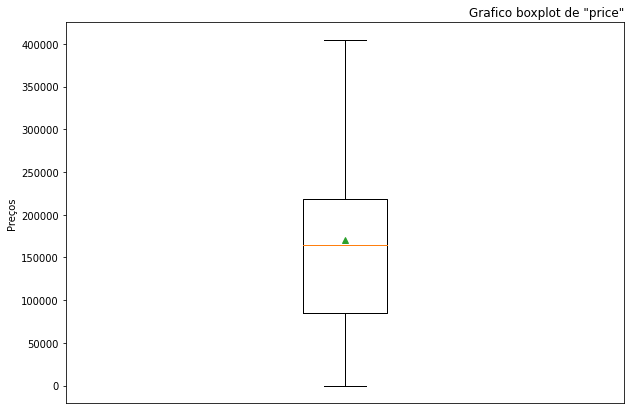

In [ ]:
# Convertendo em boxploit
df_box_75 = df_valorizados['price'].describe()

#Depois de eliminar os outliers de price
fig = plt.figure()
plt.figure(figsize=(10, 7))
plt.boxplot(df_box_75, showmeans=True)
plt.ylabel('Preços')
plt.xticks([1], [''])
plt.title('Grafico boxplot de "price"', loc = 'right')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.show()

> **Dessa forma, adotamos o seguinte raio de preços, condizentes com o intervalo interquartil dos imóveis mais valoriados: de 139.000 até 254.937.**


### 5.1.8 Nota da Vista

>Análise estatística de coleta da moda do parametro "view", usado para classificar a vista do imóvel.

>Aparentemente a nota 0 é dada para imóveis com vista comum urbana, o que compreende a grande maioria dos imóveis, inclusive dos mais bem valorizados

In [ ]:
df_valorizados['view'].value_counts()

0    46
2     1
Name: view, dtype: int64

>**Será adotada a moda (nota 0 em view) como parâmetro no perfil.**

### 5.1.9 Média da área construída/habitável entre os 15 vizinhos mais próximos

A análise deste dado foi feita da mesma forma da área construída do próprio imóvel, utilizando o intervalo interquartil.

In [ ]:
df_valorizados['sqft_living15'].describe()

count      47.00000
mean     1518.12766
std       377.46924
min       810.00000
25%      1250.00000
50%      1500.00000
75%      1725.00000
max      2570.00000
Name: sqft_living15, dtype: float64

> O raio do parâmetro ficou entre 1250 sqft e 1725 sqft.

### 5.1.10 Média da área do lote entre os 15 vizinhos mais próximos

> A escolha da métrica de centralização e parâmetro do perfil foi feito da mesma forma da área construída entre os 15 vizinhos mais próximos.

In [ ]:
df_valorizados['sqft_lot15'].describe()

count       47.000000
mean      8185.085106
std       2623.370516
min       4179.000000
25%       6103.500000
50%       8372.000000
75%       9493.000000
max      17920.000000
Name: sqft_lot15, dtype: float64

>**O intervalo interquartil ficou entre 6.103 e 9.493 sqft.**

### 5.1.10 Ano de Construção

Análise estatística do ano de construção dos imóveis:

In [ ]:
df_valorizados['yr_built'].describe()

count      47.000000
mean     1952.617021
std        22.037077
min      1906.000000
25%      1941.500000
50%      1956.000000
75%      1968.500000
max      1985.000000
Name: yr_built, dtype: float64

>**O intervalo interquartil do ano dos imóveis mais valorizados ficoui entre 1941 e 1968.**

>Apenas para comparação, faremos a mesma análise em relação a todos os imóveis do dataframe principal:

In [ ]:
df['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

>Interessantemente, a média de idade de imóveis mais valorizados e maior do que de todos os imóveis em geral. 

>Isso quer dizer que os imóveis mais valorizados, em média, são estruturas mais antigas.

### 5.1.11 - Renovação

> Foi feita a checagem da existência de imóveis que foram objeto de renovação dentre os imóveis com maior valorização, a fim de averiguar eventual padrão ou tendência.

In [ ]:
df_multsells[df_multsells['yr_renovated'] != 0]

# sample de apenas 4 imóveis, e variação enorme de valorização. Não foi útil.

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,last price/sqft_living,price/sqft_lot,City
324,7520000520,2014-09-05,2015-03-11,187,232000.0,240500.0,8500.0,3.66,0.019572,2,...,1984,98146,47.4957,-122.352,1820,7460,187.096774,193.951613,19.186239,Seattle
717,8820903380,2014-07-28,2015-01-02,158,452000.0,730000.0,278000.0,61.50,0.389241,6,...,1990,98125,47.7142,-122.286,1120,8242,169.924812,274.436090,33.286693,Seattle
3950,1825069031,2014-08-14,2014-10-16,63,550000.0,550000.0,0.0,0.00,0.000000,4,...,1980,98074,47.6499,-122.088,2520,14789,228.215768,228.215768,65.111874,Sammamish
8433,1721801010,2014-09-03,2015-04-24,233,225000.0,302100.0,77100.0,34.27,0.147082,3,...,1964,98146,47.5080,-122.337,830,6120,125.698324,168.770950,36.764706,Seattle


>Conforme tabela acima, apenas 4 imóveis foram renovados, e os valores de valorização estão muito diferentes.

>**Assim, sem conclusão satisfatória, não iremos usar renovação como parâmetro no perfil de potencial de valorização.**

## 5.2 Definindo os imóveis com maior potencial de valorização

>Nesta seção, munidos dos parâmetros e característica retiradas do grupo de imóveis mais bem valorizados, conforme seção 5.1 deste projeto, iremos aplicar filtros ao dataframe principal de imóveis.

>Os filtros serão aplicados, utilizando as mesmas características médias dos imóveis que tiveram maior valorização, no objetivo de apontar imóveis semelhantes.

>Estes imóveis semelhantes terão, por razão da sua semelhança com o grupo de imóveis bem valorizados, maior probabilidde de valorização, e serão os melhores candidatos como objeto de investimento imobiliário.

### 5.2.1 - Criação os Filtros

> Nesta etapa do projeto, iremos criar diversas variáveis, as quais serão filtros para nosso dataframe principal. Estes filtros serão utilizados para localizarmos os imóveis mais assemelhados com os bens imobiliários que mais tiveram valorização, conforme seção 5.1

>Os números utilizados como parâmetros destes filtros foram obtidos mediante análises estatísticas, consoante item 5.1.1 até 5.1.11 deste jupyter notebook.

#### 5.2.1.1 Filtros do parâmetro price

Estipulando preço mínimo do nosso perfil de imóvel:

In [ ]:
filter_price = df['price'] >= 139000
filter_price2 = df['price'] <= 254937.5

#### 5.2.1.2 Filtros do parâmetro bedrooms

Estipulando a quantidade de quartos do nosso perfil de imóvel bem valorizado:

In [ ]:
filter_bedrooms = df['bedrooms'] == 3

#### 5.2.1.3 Filtros do parâmetro bathrooms

Estipulando a quantidade de quartos do nosso perfil de imóvel bem valorizado:

In [ ]:
filter_bathrooms = df['bathrooms'] == 1

#### 5.2.1.4 Filtros do parâmetro de área habitável/construída

>Estipulando a quantidade de quartos do nosso perfil de imóvel bem valorizado:


In [ ]:
filter_area = df['sqft_living'] >= 1297.5
filter_area2 = df['sqft_living'] <= 1845

#### 5.2.1.5 Filtros do parâmetro condition

>Estipulando o valor de condição do nosso perfil:

In [ ]:
filter_condition = df['condition'] == 3

#### 5.2.1.6 Filtros do parâmetro grade

>Definindo o valor do parâmetro "grade" do perfil de imóvel com potencial de valorização.

In [ ]:
filter_grade = df['grade'] == 7

#### 5.2.1.7 Filtros do parâmetro view

>Definindo o valor do parâmetro "view" do perfil de imóvel com potencial de valorização.

In [ ]:
filter_view = df['view'] == 0

#### 5.2.1.8 Filtros do parâmetro 'City'

>Definindo o valor do parâmetro "City" do perfil de imóvel com potencial de valorização.

>Conforme discutido no item 5.1.1.2 deste notebook, o parâmetro 'City" não foi totalmente conclusivo: Seattle é a cidade com mais imóveis bem valorizados, mas também é a maior cidade e com mais vendas.

>No entanto, conforme demonstrado ainda naquele tópico, as outras cidades com bons índices de valorização possuem amostragem demasiadamente pequena. 

>Dessa forma, o filtro do parâmetro 'City" terá a cidade de Seattle como valor. 

>No entanto, levando em consideração que cidade foi o parâmetro mais complexo de traçar o melhor valor, na ocasião da aplicação dos filtros, o dataframe será testado com e sem o filtro "City", possibilitando a análise comparativa.

In [ ]:
filter_city = df['City'] == 'Seattle'

#### 5.2.1.9 Filtros do parâmetro de área construída/habitável dos vizinhos

>Definindo o intervalo do parâmetro "sqft_living15" do perfil de imóvel com potencial de valorização:

In [ ]:
filter_neigh_living = df['sqft_living15'] >= 1250
filter_neigh_living2 = df['sqft_living15'] <= 1725

#### 5.2.1.9 Filtros do parâmetro de área de lote dos vizinhos

>Definindo o intervalo do parâmetro "sqft_lot15" do perfil de imóvel com potencial de valorização:

In [ ]:
filter_neigh_lot = df['sqft_lot15'] >= 5670
filter_neigh_lot2 = df['sqft_lot15'] <= 8789.25

#### 5.2.1.11 Filtros do parâmetro ano de construção

>Definindo o intervalo do parâmetro "yr_built" do perfil de imóvel com potencial de valorização:

In [ ]:
filter_year = df['yr_built'] >= 1941
filter_year2 = df['yr_built'] <= 1968

#### 5.2.1.12 Filtro para exclusão dos imóveis já vendidos mais de uma vez

>Levando em consideração que os imóveis que observamos a alteração de valor na prática já foram vendidos mais de uma vez, e já tiveram sua valorização realizada, iremos excluir eles da nossa lista de imóveis com perspectiva de investimento:
 

In [ ]:
filter_already_sold = ~df['id'].isin(df_multsells['id'])

### 5.2.2 - Aplicação dos Filtros

>Munidos dos filtros criados na seção 5.2.1, aplicaremos eles no dataframe completo das 21 mil vendas, a fim de destacar os imóveis mais semelhantes aos que tiveram maior valorização.

>Para isso, criaremos um novo dataframe, salvo na variável "df_valor_filtrado", que nada mais será que o dataframe original retirado do kaggle (df) com os filtros aplicados.

>Primeiramente, faremos a aplicação de todos os filtros, menos o de cidade, em razão das complexidades tratadas no item 5.1.1.2 deste Projeto:

In [ ]:
df_valor_filtrado = df[filter_price & filter_price2 & filter_bedrooms &
   filter_bathrooms & filter_area & filter_area2 &
   filter_condition & filter_grade & filter_view &
   filter_neigh_living & filter_neigh_living2 & filter_neigh_lot & filter_neigh_lot2 &
   filter_year & filter_year2 & filter_already_sold]

df_valor_filtrado.sort_values(by='price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot,City
6728,6929603769,2014-07-21,253000.0,3,1.0,1400,9750,1.0,0,0,...,1968,1998,98198,47.3862,-122.304,1640,8050,180.714286,25.948718,Seattle
3130,7832800015,2015-02-26,250000.0,3,1.0,1480,6750,1.0,0,0,...,1958,0,98146,47.5050,-122.366,1480,7594,168.918919,37.037037,Seattle
273,2976800796,2014-09-25,236000.0,3,1.0,1300,5898,1.0,0,0,...,1961,0,98178,47.5053,-122.255,1320,7619,181.538462,40.013564,Seattle
9001,1423800210,2014-09-23,230000.0,3,1.0,1640,7187,1.0,0,0,...,1966,0,98058,47.4550,-122.182,1340,8346,140.243902,32.002226,Renton
15851,7889600190,2015-01-13,229000.0,3,1.0,1590,6240,1.0,0,0,...,1956,0,98146,47.4936,-122.337,1410,6240,144.025157,36.698718,Seattle
12917,4415600040,2014-11-29,226000.0,3,1.0,1520,7200,1.0,0,0,...,1954,0,98166,47.4527,-122.352,1530,7201,148.684211,31.388889,Seattle
12247,1432900030,2014-11-21,225000.0,3,1.0,1410,7700,1.0,0,0,...,1962,0,98058,47.4577,-122.171,1510,7700,159.574468,29.220779,Renton
18191,1311200120,2014-05-13,225000.0,3,1.0,1660,7210,1.0,0,0,...,1963,0,98001,47.3394,-122.281,1660,7245,135.542169,31.206657,Auburn
7865,3211100450,2014-08-14,217000.0,3,1.0,1400,7800,1.0,0,0,...,1962,0,98059,47.4789,-122.159,1400,7800,155.000000,27.820513,Renton
4978,4365700130,2015-03-25,210000.0,3,1.0,1660,7440,1.0,0,0,...,1957,0,98106,47.5242,-122.362,1540,7440,126.506024,28.225806,Seattle


>O resultado foi um dataframe com 17 imóveis, o que é o suficiente para começarmos a seleção dos nossos imóveis. 

>No entanto, o fato de constar imóveis de cidades com a valorização média não tão alta, ou de cidades com baixo número de amostras é motivo de preocupação para a assertividade de nossa análise.

>Relembrando a descrição estatística da valorização de imóveis, agrupado por cidades, conforme já tinhamos apresentado no item 5.1.1.2:

In [ ]:
df_valorizados.groupby('City')['valorization per day'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Kent,5.0,0.816623,0.509337,0.462929,0.497348,0.534225,0.923803,1.664811
Kirkland,1.0,0.776134,NaN,0.776134,0.776134,0.776134,0.776134,0.776134
Seattle,26.0,0.753962,0.298569,0.462667,0.524669,0.651628,0.912323,1.591931
Renton,5.0,0.696741,0.197153,0.501529,0.586957,0.648667,0.730667,1.015889
Auburn,1.0,0.695643,NaN,0.695643,0.695643,0.695643,0.695643,0.695643
Redmond,1.0,0.687857,NaN,0.687857,0.687857,0.687857,0.687857,0.687857
Federal Way,3.0,0.647762,0.128482,0.514353,0.586307,0.658261,0.714467,0.770672
Sammamish,2.0,0.607626,0.033575,0.583885,0.595756,0.607626,0.619497,0.631368
Bothell,1.0,0.593897,NaN,0.593897,0.593897,0.593897,0.593897,0.593897


> As quatro cidades além de Seattle que apareceram em nossos dataframe filtrado pelo perfil foram:
1. Federal Way
2. Renton
3. Auburn
4. Kent

>Federal Way, Renton e Auburn possuem amostragem baixa, e as suas métricas de centralização da valorização encontram-se inferiores a Seattle.

>Kent, com um único imóvel dentro do nosso perfil, conta com uma das métricas de centralização (média) superior a da cidade sede do condado, porém possui mediana consideravelmente inferior, e número de amostragem inferior.

>Diante dos fatos apontados acima, levando em consideração que no geral o mercado imobiliário aparenta estar mais aquecido em Seattle, e que a quantidade de dados referentes a essa cidade nos proporciona maior embasamento para indicar imóveis como objeto de investimento, o filtro de cidade será aplicado:

In [ ]:
df_valor_filtrado = df[filter_price & filter_price2 & filter_bedrooms &
   filter_bathrooms & filter_area & filter_area2 &
   filter_condition & filter_grade & filter_view & filter_city &
   filter_neigh_living & filter_neigh_living2 & filter_neigh_lot & filter_neigh_lot2 &
   filter_year & filter_year2 & filter_already_sold]

df_valor_filtrado.sort_values(by='price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot,City
6728,6929603769,2014-07-21,253000.0,3,1.0,1400,9750,1.0,0,0,...,1968,1998,98198,47.3862,-122.304,1640,8050,180.714286,25.948718,Seattle
3130,7832800015,2015-02-26,250000.0,3,1.0,1480,6750,1.0,0,0,...,1958,0,98146,47.5050,-122.366,1480,7594,168.918919,37.037037,Seattle
273,2976800796,2014-09-25,236000.0,3,1.0,1300,5898,1.0,0,0,...,1961,0,98178,47.5053,-122.255,1320,7619,181.538462,40.013564,Seattle
15851,7889600190,2015-01-13,229000.0,3,1.0,1590,6240,1.0,0,0,...,1956,0,98146,47.4936,-122.337,1410,6240,144.025157,36.698718,Seattle
12917,4415600040,2014-11-29,226000.0,3,1.0,1520,7200,1.0,0,0,...,1954,0,98166,47.4527,-122.352,1530,7201,148.684211,31.388889,Seattle
4978,4365700130,2015-03-25,210000.0,3,1.0,1660,7440,1.0,0,0,...,1957,0,98106,47.5242,-122.362,1540,7440,126.506024,28.225806,Seattle
2183,4058802105,2014-09-04,150000.0,3,1.0,1450,6776,1.0,0,0,...,1952,0,98178,47.5056,-122.244,1680,7200,103.448276,22.136954,Seattle
10518,7888000400,2014-06-03,150000.0,3,1.0,1320,8220,1.0,0,0,...,1959,0,98198,47.3697,-122.309,1320,7920,113.636364,18.248175,Seattle


> Após aplicação de todos os filtros, foram destacados 8 imóveis.

>A fim de facilitar a decisão dos melhores imóveis para investimento, a localização dos 8 foram plotadas no seguinte mapa:

In [ ]:
fig2 = px.density_mapbox(df_valor_filtrado, lat='lat', lon='long', z='bathrooms', radius=15,
                        center=dict(lat=df_valor_filtrado["lat"].mean(), lon=df_valor_filtrado["long"].mean()), zoom=10,
                        mapbox_style="stamen-terrain")
fig2.show()

> O perfil dos 8 imóveis é extremamente semelhante, e todos encaixam-se no perfil de imóveis com boa valorização segundo nosso estudo. 

>Além disso, todos encontram-se nas áreas urbanas e centrais da cidade de Seattle e na mesma faixa de preço.

>Não existem outliers em bairros distantes ou em área rural da municipalidade.

>A fim de melhor comparação geográfica, plotaremos também o mapa geral dos imóveis com melhor valorização:


In [ ]:
fig3 = px.density_mapbox(df_valorizados, lat='lat', lon='long', z='valorization per day', radius=15,
                        center=dict(lat=df_valorizados["lat"].mean(), lon=df_valorizados["long"].mean()), zoom=10,
                        mapbox_style="stamen-terrain")
fig3.show()

>Conforme os mapas acima, de fato os nossos 8 imóveis candidatos encontram-se praticamente nas mesmas áreas de Seattle dos imóveis mais bem valorizados.

>Dessa forma, levando em consideração o entendimento do negócio, e tendo em mente que esse será o ponta-pé inicial de investimentos imobiliários do nosso cliente na reigião, chegamos a seguinte conclusão, entre os últimos 8 imóveis:

>Seria mais prudente, a fim de melhor conhecer o mercado imobiliário regional, iniciar os investimentos com o mínimo de commitment possível. Assim, a ideia seria investir nos 5 imóveis mais baratos, entre os 8 principais candidatos:

In [ ]:
df_final5_valorizados = df_valor_filtrado.sort_values(by='price', ascending=True).head()
df_final5_valorizados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot,City
2183,4058802105,2014-09-04,150000.0,3,1.0,1450,6776,1.0,0,0,...,1952,0,98178,47.5056,-122.244,1680,7200,103.448276,22.136954,Seattle
10518,7888000400,2014-06-03,150000.0,3,1.0,1320,8220,1.0,0,0,...,1959,0,98198,47.3697,-122.309,1320,7920,113.636364,18.248175,Seattle
4978,4365700130,2015-03-25,210000.0,3,1.0,1660,7440,1.0,0,0,...,1957,0,98106,47.5242,-122.362,1540,7440,126.506024,28.225806,Seattle
12917,4415600040,2014-11-29,226000.0,3,1.0,1520,7200,1.0,0,0,...,1954,0,98166,47.4527,-122.352,1530,7201,148.684211,31.388889,Seattle
15851,7889600190,2015-01-13,229000.0,3,1.0,1590,6240,1.0,0,0,...,1956,0,98146,47.4936,-122.337,1410,6240,144.025157,36.698718,Seattle


#### 5.2.2.1 Sugestão final de Investimento

Assim, a sugestão de investimento consistiria nos imóveis de seguintes IDs:
1. 4058802105
2. 7888000400
3. 4365700130
4. 4415600040
5. 7889600190

# 6 - Imóveis com a valorização menos promissora.


Aqui, faremos o caminho reverso do item anterior deste estudo. 

Iremos, da mesma forma que fizemos com os imóveis mais promissores para investimento, traçar o perfil dos bens com menos chances de renderem frutos em relação a valorização.

A primeira coisa que faremos é verificar o primeiro quartil da valorização por dia dos imóveis que foram vendidos múltiplas vezes. Esse primeiro quartil nos apontará as menores taxa de valorização dentre os referidos bens.

In [ ]:
# Verificando novamente a descrição estatística da valorização por dia.

df_multsells['valorization per day'].describe()

count    177.000000
mean       0.346593
std        0.298905
min       -0.033305
25%        0.138000
50%        0.309419
75%        0.462949
max        1.664811
Name: valorization per day, dtype: float64

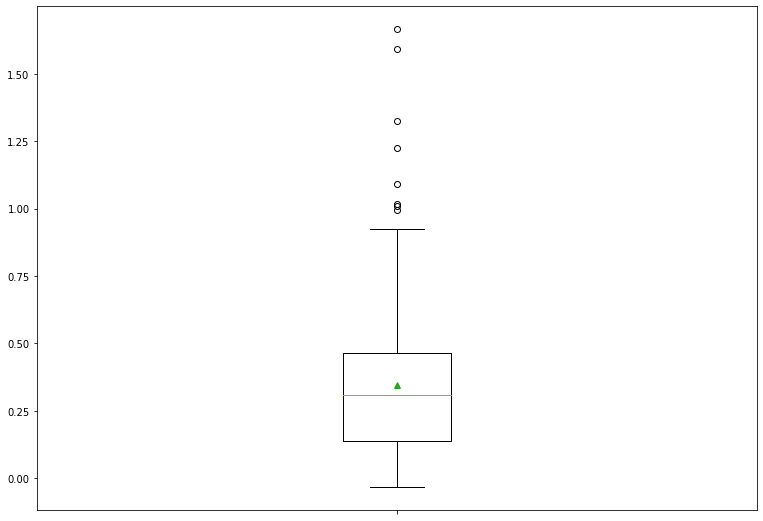

In [ ]:
# Boxplot do describe acima, para fins de visualização:

data_valorization = df_multsells['valorization per day']
 
fig = plt.figure(figsize =(10, 7))
 
# Criando as instâncias do axis
ax = fig.add_axes([0, 0, 1, 1])
 
# Criando o boxplot
bp = ax.boxplot(data_valorization, showmeans=True)

# Tirando os ticks
plt.xticks([1], [''])

 
# Imprimindo
plt.show()

> Munidos das informações acima, temos conhecimento que o quartil de imóveis com multiplas vendas com a pior valorização, tem a valorização por dia flutuando entre -0.033305 e  0.138000.

> Verificamos que existe inclusive ao menos um caso de desvalorização.

> Agora devemos traçar o perfil desses imóveis.

> Primeiro, criaremos um novo dataframe com esses casos que nos interessam atualmente, para depois analisarmos o mesmo:

In [ ]:
df_desvalorizado = df_multsells.loc[df_multsells['valorization per day'] < 0.138]
df_desvalorizado.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,last price/sqft_living,price/sqft_lot,City
313,4139480200,2014-06-18,2014-12-09,174,1384000.0,1400000.0,16000.0,1.16,0.006667,4,...,0,98006,47.5503,-122.102,3860,11244,322.610723,326.340326,114.351814,Bellevue
324,7520000520,2014-09-05,2015-03-11,187,232000.0,240500.0,8500.0,3.66,0.019572,2,...,1984,98146,47.4957,-122.352,1820,7460,187.096774,193.951613,19.186239,Seattle
836,8682262400,2014-07-18,2015-05-13,299,430000.0,419950.0,-10050.0,-2.34,-0.007826,2,...,0,98053,47.7176,-122.033,1350,4479,318.518519,311.074074,107.419435,Redmond
1464,3630120700,2014-05-13,2015-01-07,239,757000.0,765000.0,8000.0,1.06,0.004435,3,...,0,98029,47.5534,-122.002,2950,5198,237.304075,239.811912,143.289797,Issaquah
2038,3395040550,2014-07-28,2015-04-29,275,250000.0,320000.0,70000.0,28.00,0.101818,3,...,0,98108,47.5434,-122.293,1540,2890,163.398693,209.150327,86.505190,Seattle


## 6.1 Análise exploratória dos imóveis com baixa valorização:

Com um novo dataframe em mão, que representa os imóveis com a menor valorização entre os bens com multiplas vendas, podemos analisar seus parâmetros médios e tendências a fim de traçar o perfil deste bem:

O primeiro parâmetro que iremos observar é a localização do imóvel, que geralmente é uma das características que mais afeta a valorização do mesmo.

Iremos checar as cidades e *zip codes* mais comuns entre nosso dataframe de mal valorizados:

In [ ]:
df_desvalorizado.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning:

All-NaN slice encountered



,id,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,last price/sqft_living,price/sqft_lot
id,1.000000,0.363118,0.296935,0.297895,0.098728,-0.020199,-0.216528,-0.047343,0.246604,0.173516,0.005973,0.180174,nan,0.134139,0.018739,0.262383,0.214360,-0.005215,0.125953,-0.019027,-0.120094,0.236074,0.301086,0.173098,0.052223,0.191373,0.193252,0.187347
date difference,0.363118,1.000000,-0.051089,-0.023267,0.338711,0.358432,0.031136,-0.048794,0.112308,-0.083975,-0.012799,0.142044,nan,-0.031202,-0.024051,-0.061447,-0.046421,-0.089259,0.134805,-0.212855,0.044503,-0.103593,0.051393,-0.107927,0.008308,-0.097285,-0.054348,0.049492
price,0.296935,-0.051089,1.000000,0.997101,0.254561,-0.319862,-0.316585,0.279306,0.454067,0.783829,0.329179,0.211879,nan,0.497447,0.463650,0.733457,0.682616,0.433936,0.202317,-0.125571,-0.422684,0.354078,0.108468,0.783864,0.205379,0.575274,0.550865,0.285574
last price,0.297895,-0.023267,0.997101,1.000000,0.327407,-0.259456,-0.259671,0.273227,0.447170,0.774301,0.328205,0.216289,nan,0.492834,0.472082,0.724340,0.679000,0.421165,0.198606,-0.135258,-0.410839,0.358643,0.109491,0.772566,0.190045,0.575893,0.560664,0.278860
price difference,0.098728,0.338711,0.254561,0.327407,1.000000,0.674512,0.631090,0.004124,0.044653,0.107323,0.083538,0.117797,nan,0.086325,0.242272,0.097860,0.152966,-0.035858,0.011793,-0.159708,0.027371,0.161199,0.044608,0.084834,-0.135036,0.175510,0.285063,-0.002113
price difference %,-0.020199,0.358432,-0.319862,-0.259456,0.674512,1.000000,0.867315,-0.138878,-0.232304,-0.327476,-0.142949,-0.135681,nan,-0.146970,-0.110596,-0.340882,-0.301511,-0.155161,-0.182069,-0.126081,0.201541,-0.109773,0.021407,-0.321580,-0.219751,-0.231986,-0.106377,-0.250834
valorization per day,-0.216528,0.031136,-0.316585,-0.259671,0.631090,0.867315,1.000000,-0.129945,-0.348221,-0.379511,-0.134671,-0.246159,nan,-0.202843,-0.049794,-0.390142,-0.342315,-0.191192,-0.265741,-0.124345,0.220142,-0.109591,-0.019141,-0.371778,-0.228093,-0.163477,-0.043672,-0.309107
bedrooms,-0.047343,-0.048794,0.279306,0.273227,0.004124,-0.138878,-0.129945,1.000000,0.461685,0.462158,0.047778,0.165635,nan,0.024893,0.080736,0.282094,0.434333,0.204854,0.184891,-0.077670,-0.117650,-0.073313,0.043128,0.298257,0.106843,-0.130115,-0.148617,0.020404
bathrooms,0.246604,0.112308,0.454067,0.447170,0.044653,-0.232304,-0.348221,0.461685,1.000000,0.718447,0.200646,0.512698,nan,0.341095,-0.028505,0.652125,0.670970,0.325215,0.576633,-0.253424,-0.363377,-0.064873,0.190819,0.517055,0.167274,-0.144463,-0.173520,0.365171
sqft_living,0.173516,-0.083975,0.783829,0.774301,0.107323,-0.327476,-0.379511,0.462158,0.718447,1.000000,0.474254,0.267444,nan,0.415610,0.193166,0.866555,0.858990,0.572639,0.409161,-0.095598,-0.458728,0.109654,0.302453,0.859531,0.360222,0.022182,-0.013455,0.072432


### 6.1.1 Análise de localização: Zipcode e Cidade.

In [ ]:
# Visualizando a descrição estatística de valorização por dia agrupada por zip
# code. Não foi muito útil, em razão da quantidade de zipcodes.  

df_desvalorizado.groupby('zipcode')['valorization per day'].describe().sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98010,1.0,-0.026520,NaN,-0.026520,-0.026520,-0.026520,-0.026520,-0.026520
98033,1.0,-0.012278,NaN,-0.012278,-0.012278,-0.012278,-0.012278,-0.012278
98107,1.0,-0.008943,NaN,-0.008943,-0.008943,-0.008943,-0.008943,-0.008943
98074,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
98027,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
98029,1.0,0.004435,NaN,0.004435,0.004435,0.004435,0.004435,0.004435
98115,1.0,0.006054,NaN,0.006054,0.006054,0.006054,0.006054,0.006054
98004,1.0,0.007796,NaN,0.007796,0.007796,0.007796,0.007796,0.007796
98125,2.0,0.008367,0.058933,-0.033305,-0.012469,0.008367,0.029203,0.050039


In [ ]:
# Tentarmos agora fazer uma contagem dos zipcodes do nosso dataframe:

df_desvalorizado['zipcode'].value_counts()

98006    6
98065    3
98125    2
98077    2
98058    2
98023    2
98053    2
98074    1
98010    1
98027    1
98166    1
98075    1
98168    1
98106    1
98055    1
98038    1
98033    1
98144    1
98112    1
98052    1
98039    1
98014    1
98146    1
98107    1
98103    1
98029    1
98108    1
98115    1
98002    1
98004    1
98059    1
98045    1
Name: zipcode, dtype: int64

In [ ]:
#   Verificando a(s) cidade(s) dos zipcodes que mais tiveram imóveis 
# com baixa valorização.

print(df_zip_city[df_zip_city['Zip Code'] == 98006]['City'])
print(df_zip_city[df_zip_city['Zip Code'] == 98065]['City'])

6    Bellevue
Name: City, dtype: object
39    Snoqualmie
Name: City, dtype: object


In [ ]:
#   Perfeito, agora vamos verificar qual é a cidade que mais apareceu no 
# dataframe dos mal valorizados.

df_desvalorizado['City'].value_counts()

Seattle          12
Bellevue          7
Renton            4
Redmond           3
Snoqualmie        3
Issaquah          2
Sammamish         2
Federal Way       2
Woodinville       2
Auburn            1
Medina            1
Carnation         1
Black Diamond     1
Kirkland          1
Maple Valley      1
North Bend        1
Name: City, dtype: int64

A cidade com mais imóveis desvalorizados foi Seattle. Temos que levar me consideração que Seattle é a maior e cidade sede de *King's County*. 

Dessa forma, vamos observar qual é a proporção de imóveis de Seattle no dataframe de bens vendidos mais de uma vez:

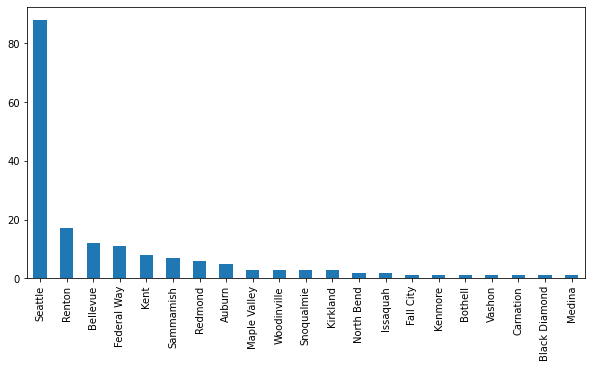

In [ ]:
plt.figure(figsize=[10,5])
df_multsells['City'].value_counts().plot(kind='bar')

plt.show()

Dos 177 imóveis com multiplas vendas, 88 são de Seattle. Assim, é lógico que a maioria dos imóveis com boa valorização ou não sejam de lá.

Dessa forma, a fim de relativizarmos a valorização por dia com as cidades, iremos parar de usar uma contagem total, e faremos a verificação das descrições estatísticas de cada cidade:

In [ ]:
#  Descrição de valorização por dia, agrupando por cidade, ordenando do menos
# pro mais valorizado.

df_desvalorizado.groupby('City')['valorization per day'].describe().sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Black Diamond,1.0,-0.026520,NaN,-0.026520,-0.026520,-0.026520,-0.026520,-0.026520
Kirkland,1.0,-0.012278,NaN,-0.012278,-0.012278,-0.012278,-0.012278,-0.012278
Issaquah,2.0,0.002218,0.003136,0.000000,0.001109,0.002218,0.003326,0.004435
Maple Valley,1.0,0.012571,NaN,0.012571,0.012571,0.012571,0.012571,0.012571
Bellevue,7.0,0.018530,0.034272,-0.010404,0.003333,0.007796,0.016625,0.092405
Sammamish,2.0,0.018597,0.026300,0.000000,0.009298,0.018597,0.027895,0.037194
Carnation,1.0,0.020805,NaN,0.020805,0.020805,0.020805,0.020805,0.020805
Federal Way,2.0,0.022981,0.014795,0.012519,0.017750,0.022981,0.028212,0.033443
Woodinville,2.0,0.024905,0.014671,0.014531,0.019718,0.024905,0.030093,0.035280


In [ ]:
# plotando no mapa a localização dos imóveis mais desvalorizados:

fig_not_wanted = px.density_mapbox(df_desvalorizado, lat='lat', lon='long', z='waterfront', radius=15,
                        center=dict(lat=df_desvalorizado["lat"].mean(), lon=df_desvalorizado["long"].mean()), zoom=8,
                        mapbox_style="stamen-terrain")
fig_not_wanted.show()

> Da mesma forma que ocorreu na definição de filtro de cidade nos imóveis bem valorizados, as análises estatísticas de valorização por minucipalidade não foram de todo conclusivas.

>Um fato indiscutível é que a cidade de Seattle de fato possui áreas (principalmente ao norte) com diversas ocorrências de imóveis com valorização extremamente baixa.

>Outras cidades, apesarem de possuir medidas centralizadoras de valorização pior que Seattle, não possuem amostragem numerosa o suficiente para embasar um estudo sem viés.

>Assim, semelhante como fizemos com os imóveis com melhor potencial de valorização, iremos lançar mão do filtro 'City' após conhecermos melhor o perfil dos imóveis com baixo potencial de valorização, com ajuda dos demais parâmetros.

### 6.1.2 Análise de banheiros:

>Análise estatística de banheiros dos 25% menos valorizados.

>Da mesma forma que fizemos no perfil de imóveis com maior valorização, usaremos a moda como medida centralizadora em parâmetros como número de banheiros, quartos, grade, condition e etc..

In [ ]:
df_desvalorizado['bathrooms'].value_counts()

2.50    11
1.00     7
1.75     7
3.00     4
3.25     3
2.25     3
2.75     3
4.00     2
3.50     2
1.50     1
2.00     1
Name: bathrooms, dtype: int64

In [ ]:
df_desvalorizado['bathrooms'].mode()

0    2.5
dtype: float64

>**Perfil de imóveis com baixa valorização conta com 2.5 banheiros, o que provavelmente significa 2 banheiros e 1 lavablo. Esse valor da moda será utilizada no nosso perfil.**

### 6.1.3 Análise de quartos:

>Análise de quartos dos imóveis menos valorizados:

In [ ]:
df_desvalorizado['bedrooms'].describe()

count    44.000000
mean      3.363636
std       1.036338
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: bedrooms, dtype: float64

In [ ]:
df_desvalorizado['bedrooms'].value_counts()

3    18
4    12
2     7
5     5
6     1
1     1
Name: bedrooms, dtype: int64

>**Da mesma forma dos banheiros, no número de quartos iremos utilizar a moda, no caso 3, em nosso perfil.**

### 6.1.4 Análise de área construída:

>Análise estatística da área construída/habitável dos imóveis menos valorizados:

In [ ]:
df_desvalorizado['sqft_living'].describe()

count      44.000000
mean     2272.045455
std      1033.617669
min       820.000000
25%      1460.000000
50%      2060.000000
75%      2927.500000
max      5290.000000
Name: sqft_living, dtype: float64

>**Intervalo interquartil ficou entre 1460 e 2927 square feet (pés quadrados).**

### 6.1.5 Análise de condição de preservação:

>Análise estatística do parâmetro condition:

In [ ]:
df_desvalorizado['condition'].describe()

count    44.000000
mean      3.295455
std       0.631703
min       2.000000
25%       3.000000
50%       3.000000
75%       3.250000
max       5.000000
Name: condition, dtype: float64

In [ ]:
df_desvalorizado['condition'].value_counts()

3    32
4     8
5     3
2     1
Name: condition, dtype: int64

**A moda deste parâmetro foi extremamente presente nos imóveis de baixa valorização. Conforme explicado no item 6.1.2, iremos adotar a moda como valor do nosso perfil: Condition nota 3.**

### 6.1.6 Análise de nota de qualidade:

>Análise estatística do parâmetro grade (qualidade de material e construção):

In [ ]:
df_desvalorizado['grade'].describe()

count    44.000000
mean      8.000000
std       1.670538
min       5.000000
25%       7.000000
50%       8.000000
75%       9.000000
max      12.000000
Name: grade, dtype: float64

In [ ]:
df_desvalorizado['grade'].value_counts()

8     11
7     11
9      7
6      4
10     4
11     3
5      3
12     1
Name: grade, dtype: int64

>**A grande maioria dos imóveis com baixa valorização contaram com a classificação 8 ou 7 no quesito grade. Dessa forma, utilizamos ambos no nosso filtro do perfil.**

### 6.1.7 Análise de andares:

>Análise estatística do parâmetro número de andares:

In [ ]:
df_desvalorizado['floors'].describe()

count    44.000000
mean      1.545455
std       0.578874
min       1.000000
25%       1.000000
50%       1.500000
75%       2.000000
max       3.000000
Name: floors, dtype: float64

In [ ]:
df_desvalorizado['floors'].value_counts()

1.0    21
2.0    19
1.5     2
3.0     2
Name: floors, dtype: int64

**Novamente utilizaremos a moda no parâmetro floors: 1 andar.**

### 6.1.8 Análise de preço:

>Análise estatística do parâmetro preço:

In [ ]:
df_desvalorizado['price'].describe().round(2)

count         44.00
mean      632101.27
std       424113.52
min       115000.00
25%       336500.00
50%       520000.00
75%       760875.00
max      1895000.00
Name: price, dtype: float64

>Da mesma forma que fizemos com os imóveis com boa valorização, no quesito preço, por ser um dado mais ortodoso, adotaremos para nosso perfil todo o intervalo interquartil:
>**Entre 336.500,00 dólares e 760.875,00 dólares.**

### 6.1.9 Análise de vista do imóvel:

>Análise estatística do parâmetro *View*:

In [ ]:
df_desvalorizado['view'].describe()

count    44.000000
mean      0.477273
std       1.229268
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       4.000000
Name: view, dtype: float64

In [ ]:
df_desvalorizado['view'].value_counts()

0    38
3     3
4     3
Name: view, dtype: int64

>**Usando a moda, novamente, para esse parâmetro: 38.**

### 6.1.10 Análise de área construída da vizinhança:

>Análise estatística do parâmetro área construída dos 15 imóveis mais próximos:

In [ ]:
df_desvalorizado['sqft_living15'].describe()

count      44.000000
mean     2322.272727
std       817.363497
min      1070.000000
25%      1817.500000
50%      2115.000000
75%      2865.000000
max      4060.000000
Name: sqft_living15, dtype: float64

>**O intervalo interquartil ficou entre 1817 e 2865 square feet (pés quadrados). Será esse intervalo que será adotado em nosso perfil.**

### 6.1.11 Análise de área do lote da vizinhança:

>Análise estatística do parâmetro "área do lote dos 15 imóveis mais próximos":

In [ ]:
df_desvalorizado['sqft_lot15'].describe()

count        44.000000
mean      15631.340909
std       29563.761676
min        1334.000000
25%        5244.500000
50%        7732.000000
75%       11558.000000
max      183897.000000
Name: sqft_lot15, dtype: float64

>**O intervalo interquartil foi adotado para o perfil do imóveis com baixo potencial de valorização: Entre 5244.5 e 11558 square feet (pés quadrados).**

### 6.1.12 Análise do ano de construção:

>Análise estatística do parâmetro *year built*.

In [ ]:
df_desvalorizado['yr_built'].describe()

count      44.000000
mean     1978.454545
std        27.032671
min      1921.000000
25%      1957.250000
50%      1987.000000
75%      1999.500000
max      2013.000000
Name: yr_built, dtype: float64

>**Novamente, adotaremos o intervalo interquartil nesse parâmetro: entre 1957 e 1999**.

>Interessante notar que o perfil de imóveis que menos valorizaram são, em média, mais novos que os imóveis que obtiveram altas taxas de valorização.

# 6.2 Definindo os imóveis com menor potencial de valorização

### 6.2.1 Criação de Filtros

>Seguindo o mesmo *modus operandi* da seção 5 deste Projeto, iremos definir filtros baseados nos dados obtidos na análise descritiva imediatamente acima deste quadro.

>Munido dos dados, intervalos e métricas centralizadoras dos imóveis com baixa valorização, esses filtros serão declarados dentro de variáveis.

>A fim de manter esse estudo mais sucinto e breve possível, as declarações das variáveis responsáveis pelos filtros, neste capítulo, serão feitas em uma só célula:

In [ ]:
nw_filter_price = df['price'] >= 336500
nw_filter_price2 = df['price'] <= 760875
nw_filter_bedrooms = df['bedrooms'] == 3
nw_filter_bathrooms = df['bathrooms'] == 2.5
nw_filter_area = df['sqft_living'] >= 1460
nw_filter_area2 = df['sqft_living'] <= 2927.5
nw_filter_condition = df['condition'] == 3
nw_filter_grade = df['grade'] >= 7
nw_filter_grade2 = df['grade'] <= 8
nw_filter_floor = df['floors'] == 1
nw_filter_view = df['view'] == 0
nw_filter_neigh_living = df['sqft_living15'] >= 1817
nw_filter_neigh_living2 = df['sqft_living15'] <= 2865
nw_filter_neigh_lot = df['sqft_lot15'] >= 5244.5
nw_filter_neigh_lot2 = df['sqft_lot15'] <= 11558
nw_filter_year = df['yr_built'] >= 1957
nw_filter_year2 = df['yr_built'] <= 1999
filter_already_sold = ~df['id'].isin(df_multsells['id'])

nw_filter_city = df['City'] == 'Seattle'



> Novamente, o filtro do parâmetro 'City' será aplicado separadamente, conforme necessidade mediante análise.

### 6.2.2 Aplicação de Filtros

> Primeiro, iremos aplicar os filtros sem o da cidade, e analisar os resultados:

In [ ]:
df_desvalor_filtrado = df[nw_filter_price & nw_filter_price2 & nw_filter_bedrooms & nw_filter_bathrooms & nw_filter_area & nw_filter_area2 & nw_filter_condition & nw_filter_grade & nw_filter_grade2 &
   nw_filter_floor & nw_filter_view & nw_filter_neigh_living & nw_filter_neigh_living2 & nw_filter_neigh_lot & nw_filter_neigh_lot2 & nw_filter_year & nw_filter_year2 & filter_already_sold]
df_desvalor_filtrado

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot,City
621,3010300240,2014-06-23,577000.0,3,2.5,2060,5750,1.0,0,0,...,1976,0,98116,47.5671,-122.391,1920,5750,280.097087,100.347826,Seattle
2066,2296700260,2014-06-26,460000.0,3,2.5,1730,8490,1.0,0,0,...,1969,0,98034,47.7187,-122.219,1870,7400,265.895954,54.181390,Kirkland
3792,1245500099,2015-05-06,702000.0,3,2.5,2190,8528,1.0,0,0,...,1991,0,98033,47.6943,-122.209,2060,9811,320.547945,82.317073,Kirkland
4221,7893801862,2014-08-11,379260.0,3,2.5,1730,7202,1.0,0,0,...,1991,0,98198,47.4099,-122.329,2100,8125,219.225434,52.660372,Seattle
4319,565300110,2014-12-16,432500.0,3,2.5,2390,6435,1.0,0,0,...,1978,0,98034,47.7260,-122.194,2020,7300,180.962343,67.210567,Kirkland
4323,1015500300,2014-05-15,455000.0,3,2.5,1870,7344,1.0,0,0,...,1980,0,98034,47.7265,-122.206,1930,7344,243.315508,61.955338,Kirkland
4647,3223059015,2015-04-10,397500.0,3,2.5,1860,44093,1.0,0,0,...,1978,0,98055,47.4381,-122.188,1900,6130,213.709677,9.015036,Renton
5277,1787600224,2015-03-10,390000.0,3,2.5,1640,6991,1.0,0,0,...,1967,0,98125,47.7255,-122.327,1860,7342,237.804878,55.786011,Seattle
5436,7301300050,2014-11-19,375000.0,3,2.5,1930,6180,1.0,0,0,...,1961,0,98155,47.7481,-122.327,1940,6180,194.300518,60.679612,Seattle
6136,3645500050,2014-05-14,543000.0,3,2.5,2090,7640,1.0,0,0,...,1962,2014,98133,47.7369,-122.338,2090,7668,259.808612,71.073298,Seattle


>O resultado foi promissor, 32 imóveis com os parâmetros de bens que não costumam valoriar, como número de banheiros, área, idade da estrutura, e etc..

>Nesse esteira, iremos visulizálos no mapa:

In [ ]:
fig_poten_not_wanted = px.density_mapbox(df_desvalor_filtrado, lat='lat', lon='long', z='waterfront', radius=15,
                        center=dict(lat=df_desvalor_filtrado["lat"].mean(), lon=df_desvalor_filtrado["long"].mean()), zoom=9,
                        mapbox_style="stamen-terrain")

fig_poten_not_wanted.show()

>Diversos imóveis em áreas fora da cidade de Seattle (East Renton, Bellevuem entre outros).

>Porém, é possível verificar uma grande mancha de imóveis com baixo potencial de valorização na parte norte da cidade de Seattle. Trata-se do aglomerado mais a esquerda superior do mapa.

Faremos agora a contagem de aparições das cidades entre os imóveis com prospecto não promissor:

In [ ]:
df_desvalor_filtrado['City'].value_counts()

Seattle         11
Kirkland         5
Renton           4
Bellevue         2
Sammamish        2
Issaquah         2
Maple Valley     1
Woodinville      1
Federal Way      1
Redmond          1
Kent             1
Kenmore          1
Name: City, dtype: int64

>Da mesma forma dos valorizados, Seattle, por ser a maior cidade, aparece como principal figurante.

>Ainda, na mesma esteira de pensamento, as outras municipalidades contam com uma amostragem pequena demais para tomarmos decisões embasadas.

>O que é nítido é que observando o mapa, a região dos imóveis de Seattle sem valorização é completamente diferente da região onde os imóveis possuem alteração de valor positica. Vejamos:

In [ ]:
df_desvalor_filtrado_seattle = df[nw_filter_price & nw_filter_price2 & nw_filter_bedrooms & nw_filter_bathrooms & 
                                  nw_filter_area & nw_filter_area2 & nw_filter_condition & nw_filter_grade & 
                                  nw_filter_grade2 & nw_filter_floor & nw_filter_view & nw_filter_neigh_living & 
                                  nw_filter_neigh_living2 & nw_filter_neigh_lot & nw_filter_neigh_lot2 & 
                                  nw_filter_year & nw_filter_year2 & filter_already_sold & nw_filter_city]

fig_poten_not_wanted = px.density_mapbox(df_desvalor_filtrado_seattle, lat='lat', lon='long', z='waterfront', radius=15,
                        center=dict(lat=df_desvalor_filtrado_seattle["lat"].mean(), lon=df_desvalor_filtrado_seattle["long"].mean()), zoom=9,
                        mapbox_style="stamen-terrain")

fig_poten_not_wanted.show()

In [ ]:
fig3 = px.density_mapbox(df_valorizados[df_valorizados['City']=='Seattle'], lat='lat', lon='long', z='waterfront', radius=15,
                        center=dict(lat=df_valorizados[df_valorizados['City']=='Seattle']["lat"].mean(), lon=df_valorizados[df_valorizados['City']=='Seattle']["long"].mean()), zoom=8,
                        mapbox_style="stamen-terrain")
fig3.show()

Os imóveis valorizados em Seattle concentram-se na parte Sul da cidade e do *Lake Washington*, a beira mar no Oeste da cidade. Em regra, em regiões próximas ao mar ou ao Lago.

Já os imóveis com pouco potencial de valorização encontram-se ao mesmo tempo ao norte da cidade, mas na parte mais continental, longe do mar e do lago, especialemente próximos da rodovia interestatal I-5.

Levando em consideração a concentração de imóveis desvalorizados numa unica região, com amostragem robusta para uma área tão pequena (norte da cidade, próximo a rodovia I-5), é possível afirmar com confiança que ali encontram-se imóveis com potencial de valorização baixo.

Dessa forma diante de todos esses dados, e levando em consideração a maior robustez dos dados referentes a cidade de Seattle, utilizaremos o filtro da mesma, para analisarmos os imóveis desta cidade em específico:

In [ ]:
df_desvalor_filtrado = df[nw_filter_price & nw_filter_price2 & nw_filter_bedrooms & nw_filter_bathrooms & 
                                  nw_filter_area & nw_filter_area2 & nw_filter_condition & nw_filter_grade & 
                                  nw_filter_grade2 & nw_filter_floor & nw_filter_view & nw_filter_neigh_living & 
                                  nw_filter_neigh_living2 & nw_filter_neigh_lot & nw_filter_neigh_lot2 & 
                                  nw_filter_year & nw_filter_year2 & filter_already_sold & nw_filter_city]
df_desvalor_filtrado

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot,City
621,3010300240,2014-06-23,577000.0,3,2.5,2060,5750,1.0,0,0,...,1976,0,98116,47.5671,-122.391,1920,5750,280.097087,100.347826,Seattle
4221,7893801862,2014-08-11,379260.0,3,2.5,1730,7202,1.0,0,0,...,1991,0,98198,47.4099,-122.329,2100,8125,219.225434,52.660372,Seattle
5277,1787600224,2015-03-10,390000.0,3,2.5,1640,6991,1.0,0,0,...,1967,0,98125,47.7255,-122.327,1860,7342,237.804878,55.786011,Seattle
5436,7301300050,2014-11-19,375000.0,3,2.5,1930,6180,1.0,0,0,...,1961,0,98155,47.7481,-122.327,1940,6180,194.300518,60.679612,Seattle
6136,3645500050,2014-05-14,543000.0,3,2.5,2090,7640,1.0,0,0,...,1962,2014,98133,47.7369,-122.338,2090,7668,259.808612,71.073298,Seattle
6228,9561100010,2014-11-04,380000.0,3,2.5,1840,6985,1.0,0,0,...,1971,0,98133,47.7586,-122.342,2160,7990,206.521739,54.402291,Seattle
7265,123039642,2015-05-01,540000.0,3,2.5,1970,14876,1.0,0,0,...,1981,0,98146,47.5031,-122.372,2030,8008,274.111675,36.300081,Seattle
8137,1099900120,2015-01-26,345000.0,3,2.5,2340,8414,1.0,0,0,...,1993,0,98188,47.4685,-122.265,2340,7268,147.435897,41.003090,Seattle
8167,1826049442,2015-03-10,441000.0,3,2.5,1890,11036,1.0,0,0,...,1973,0,98133,47.7426,-122.354,2040,7524,233.333333,39.960130,Seattle
11466,6415100350,2015-04-13,405000.0,3,2.5,2160,10200,1.0,0,0,...,1978,0,98133,47.7295,-122.331,2010,7850,187.500000,39.705882,Seattle


Agora obtivemos 11 imóveis em Seattle sem valorização prevista. Iremos novamente visualizá-los no mapa:

In [ ]:
fig_poten_not_wanted = px.density_mapbox(df_desvalor_filtrado, lat='lat', lon='long', z='waterfront', radius=15,
                        center=dict(lat=df_desvalor_filtrado["lat"].mean(), lon=df_desvalor_filtrado["long"].mean()), zoom=8,
                        mapbox_style="stamen-terrain")

fig_poten_not_wanted.show()

Novamente, com 11 imóveis de praticamente iguais parâmetros, iremos tomar como decisor o argumento geográfico.

Conforme apontado acima, a maioria dos imóveis sem potencial de valorização encontram-se próximos a rodovia interestatal I-5, ao norte da cidade de Seattle.

De 11 imóveis, 6 encontram-se naquela região.

Esses 6 serão selecionados como os imóveis que fariamos uma contra-indicação como objeto de investimento imobiliário.

Para delimitarmos ao número de 5, conforme objetivo do projeto, selecionaremos os 5 imóveis mais caros dentre os 6, já que não temos perspectivas de alta valorização, e quanto mais dinheiro investido ali, maior será o prejuízo de nossos clientes:

In [ ]:
#aplicado o filtro de latitude, para seleção dos imóveis na parte norte de Seattle:
#aplicado filtro de preço, a fim de selecionar os 5 mais caros:

df_bottom_5 = df_desvalor_filtrado.loc[(df_desvalor_filtrado['lat']>=47.7255)&(df_desvalor_filtrado['lat']<=47.7586)&(df_desvalor_filtrado['price']>375000)]
df_bottom_5

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_living,price/sqft_lot,City
5277,1787600224,2015-03-10,390000.0,3,2.5,1640,6991,1.0,0,0,...,1967,0,98125,47.7255,-122.327,1860,7342,237.804878,55.786011,Seattle
6136,3645500050,2014-05-14,543000.0,3,2.5,2090,7640,1.0,0,0,...,1962,2014,98133,47.7369,-122.338,2090,7668,259.808612,71.073298,Seattle
6228,9561100010,2014-11-04,380000.0,3,2.5,1840,6985,1.0,0,0,...,1971,0,98133,47.7586,-122.342,2160,7990,206.521739,54.402291,Seattle
8167,1826049442,2015-03-10,441000.0,3,2.5,1890,11036,1.0,0,0,...,1973,0,98133,47.7426,-122.354,2040,7524,233.333333,39.960130,Seattle
11466,6415100350,2015-04-13,405000.0,3,2.5,2160,10200,1.0,0,0,...,1978,0,98133,47.7295,-122.331,2010,7850,187.500000,39.705882,Seattle


>De posse dos 5 imóveis em um dataframe específico, iremos mostrá-los no mapa:

In [ ]:
fig_poten_not_wanted = px.density_mapbox(df_bottom_5, lat='lat', lon='long', z='waterfront', radius=15,
                        center=dict(lat=df_bottom_5["lat"].mean(), lon=df_bottom_5["long"].mean()), zoom=8,
                        mapbox_style="stamen-terrain")

fig_poten_not_wanted.show()

#### 6.2.2.1 Contraindicação final

>Por fim, apontando especificamente os IDs dos imóveis os quais **contra-indicamos** para investimento imobiliário:

1. 1787600224
1. 3645500050
1. 9561100010
1. 1826049442
1. 6415100350

